"""

This is a project looking at US movies and how variables such as duration, avg_vote, budget, release date, actor, director, and genre that contribute to gross income. There are four main sections in this notebook:

Step 1: Set Up Analysis and Jupyter Notebook
Step 2: Data Cleaning
Step 3: Exploratory Data Analysis
Step 4: Insights and Discussions of Analysis


Acknowledgement:
Thanks to Stefano Leone's dataset sourced at https://www.kaggle.com/stefanoleone992/imdb-extensive-dataset that consists of 81K+ movies scraped from IMDb.

"""

# STEP 1:  SET UP JUPYTER NOTEBOOK AND ANALYSIS

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
import numpy as np


/Users/SRobertson/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#Read excel file into pandas dataframe ("df") in Jupyter Notebook
MoviesDf=pd.read_excel('IMDb movies.xlsx')
MoviesDf.head()


,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
0,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906.0,1906-12-26 00:00:00,"Biography, Crime, Drama",70.0,Australia,NaN,Charles Tait,...,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,6.1,537.0,2250,NaN,NaN,NaN,7.0,7.0
1,tt0001892,Den sorte dr√∏m,Den sorte dr√∏m,1911.0,1911-08-19 00:00:00,Drama,53.0,"Germany, Denmark",NaN,Urban Gad,...,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",Two men of high rank are both wooing the beaut...,5.9,171.0,NaN,NaN,NaN,NaN,4.0,2.0
2,tt0002101,Cleopatra,Cleopatra,1912.0,1912-11-13 00:00:00,"Drama, History",100.0,USA,English,Charles L. Gaskill,...,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",The fabled queen of Egypt's affair with Roman ...,5.2,420.0,45000,NaN,NaN,NaN,24.0,3.0
3,tt0002130,L'Inferno,L'Inferno,1911.0,1911-03-06 00:00:00,"Adventure, Drama, Fantasy",68.0,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",...,"Salvatore Papa, Arturo Pirovano, Giuseppe de L...",Loosely adapted from Dante's Divine Comedy and...,7.0,2019.0,NaN,NaN,NaN,NaN,28.0,14.0
4,tt0002199,"From the Manger to the Cross; or, Jesus of Naz...","From the Manger to the Cross; or, Jesus of Naz...",1912.0,1913,"Biography, Drama",60.0,USA,English,Sidney Olcott,...,"R. Henderson Bland, Percy Dyer, Gene Gauntier,...","An account of the life of Jesus Christ, based ...",5.7,438.0,NaN,NaN,NaN,NaN,12.0,5.0


In [3]:
MoviesDf.shape

(81274, 22)

In [4]:
MoviesDf.describe()

,year,duration,avg_vote,votes,metascore,reviews_from_users,reviews_from_critics
count,81273.000000,81273.000000,81273.000000,8.127300e+04,12722.000000,74196.000000,70286.000000
mean,1993.007210,100.565981,5.926587,9.421771e+03,55.762695,43.753194,27.992758
std,23.992284,25.320189,1.243315,5.220245e+04,17.757453,159.903568,58.708764
min,1906.000000,40.000000,1.000000,9.900000e+01,1.000000,1.000000,1.000000
25%,1979.000000,88.000000,5.200000,2.060000e+02,43.000000,4.000000,3.000000
50%,2002.000000,96.000000,6.100000,4.950000e+02,56.000000,9.000000,8.000000
75%,2012.000000,108.000000,6.800000,1.865000e+03,69.000000,26.000000,24.000000
max,2019.000000,3360.000000,10.000000,2.159628e+06,100.000000,8302.000000,987.000000


In [5]:
MoviesDf.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81274 entries, 0 to 81273
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_title_id          81274 non-null  object 
 1   title                  81271 non-null  object 
 2   original_title         81271 non-null  object 
 3   year                   81273 non-null  float64
 4   date_published         81273 non-null  object 
 5   genre                  81273 non-null  object 
 6   duration               81273 non-null  float64
 7   country                81234 non-null  object 
 8   language               80518 non-null  object 
 9   director               81200 non-null  object 
 10  writer                 79780 non-null  object 
 11  production_company     76947 non-null  object 
 12  actors                 81207 non-null  object 
 13  description            78842 non-null  object 
 14  avg_vote               81273 non-null  float64
 15  vo

# STEP 2: DATA CLEANING

In [6]:
# Check on the number of genres and notice too many are lumped together
print(MoviesDf.genre.nunique())
print(MoviesDf.genre.unique())


1264
['Biography, Crime, Drama' 'Drama' 'Drama, History' ...
 'Adventure, History, Sci-Fi' 'Animation, Music' nan]


In [7]:
# Separate original column "genre" that contains multiple genres into genre, genre2 and genre3.
MoviesDf[['genre','genre2','genre3']] = MoviesDf['genre'].str.split(',',expand=True)
MoviesDf.head()


,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics,genre2,genre3
0,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906.0,1906-12-26 00:00:00,Biography,70.0,Australia,NaN,Charles Tait,...,6.1,537.0,2250,NaN,NaN,NaN,7.0,7.0,Crime,Drama
1,tt0001892,Den sorte dr√∏m,Den sorte dr√∏m,1911.0,1911-08-19 00:00:00,Drama,53.0,"Germany, Denmark",NaN,Urban Gad,...,5.9,171.0,NaN,NaN,NaN,NaN,4.0,2.0,None,None
2,tt0002101,Cleopatra,Cleopatra,1912.0,1912-11-13 00:00:00,Drama,100.0,USA,English,Charles L. Gaskill,...,5.2,420.0,45000,NaN,NaN,NaN,24.0,3.0,History,None
3,tt0002130,L'Inferno,L'Inferno,1911.0,1911-03-06 00:00:00,Adventure,68.0,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",...,7.0,2019.0,NaN,NaN,NaN,NaN,28.0,14.0,Drama,Fantasy
4,tt0002199,"From the Manger to the Cross; or, Jesus of Naz...","From the Manger to the Cross; or, Jesus of Naz...",1912.0,1913,Biography,60.0,USA,English,Sidney Olcott,...,5.7,438.0,NaN,NaN,NaN,NaN,12.0,5.0,Drama,None


In [8]:
print(MoviesDf.genre.nunique()) #number of unique values in genre
print(MoviesDf.genre.unique()) #list of unique values in genre: 23


23
['Biography' 'Drama' 'Adventure' 'History' 'Crime' 'Western' 'Fantasy'
 'Comedy' 'Horror' 'Family' 'Action' 'Romance' 'Mystery' 'Animation'
 'Sci-Fi' 'Musical' 'Thriller' 'Music' 'Film-Noir' 'War' 'Sport' 'Adult'
 'Documentary' nan]


In [9]:
print(MoviesDf.genre2.nunique()) #number of unique values in genre2
print(MoviesDf.genre2.unique()) #list of unique values in genre2: 25


25
[' Crime' None ' History' ' Drama' ' War' ' Fantasy' ' Mystery' ' Family'
 ' Adventure' ' Romance' ' Comedy' ' Western' ' Horror' ' Thriller'
 ' Sport' ' Sci-Fi' ' Action' ' Music' ' Musical' ' Film-Noir'
 ' Biography' ' Animation' ' Reality-TV' ' Game-Show' ' News' nan]


In [10]:
print(MoviesDf.genre3.nunique()) #number of unique values in genre3
print(MoviesDf.genre3.unique()) #list of unique values in genre3: 23


23
[' Drama' None ' Fantasy' ' Romance' ' Mystery' ' Horror' ' History'
 ' Adventure' ' War' ' Crime' ' Sci-Fi' ' Western' ' Family' ' Sport'
 ' Thriller' ' Comedy' ' Musical' ' Film-Noir' ' Music' ' Biography'
 ' Action' ' Animation' ' Reality-TV' nan]


In [11]:
# Renaming columns
MoviesDf.rename(columns={'genre':'genre1','usa_gross_income': 'USAGrossIncome', 'worlwide_gross_income':'WorldwideGrossIncome','reviews_from_users':'UsersReviews','reviews_from_critics':'CriticsReviews'},inplace=True)
MoviesDf.tail()

,imdb_title_id,title,original_title,year,date_published,genre1,duration,country,language,director,...,avg_vote,votes,budget,USAGrossIncome,WorldwideGrossIncome,metascore,UsersReviews,CriticsReviews,genre2,genre3
81269,tt9905412,Ottam,Ottam,2019.0,2019-03-08 00:00:00,Drama,120.0,India,Malayalam,Zam,...,7.8,510.0,INR 4000000,NaN,4791,NaN,NaN,NaN,None,None
81270,tt9905462,Pengalila,Pengalila,2019.0,2019-03-08 00:00:00,Drama,111.0,India,Malayalam,T.V. Chandran,...,8.4,604.0,INR 10000000,NaN,NaN,NaN,NaN,NaN,None,None
81271,tt9911774,Padmavyuhathile Abhimanyu,Padmavyuhathile Abhimanyu,2019.0,2019-03-08 00:00:00,Drama,130.0,India,Malayalam,Vineesh Aaradya,...,8.4,369.0,NaN,NaN,NaN,NaN,NaN,NaN,None,None
81272,tt9914286,Sokagin √áocuklari,Sokagin √áocuklari,2019.0,2019-03-15 00:00:00,Drama,98.0,Turkey,Turkish,Ahmet Faik Akinci,...,7.2,190.0,NaN,NaN,2833,NaN,NaN,NaN,Family,None
81273,END,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
MoviesDf.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81274 entries, 0 to 81273
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   imdb_title_id         81274 non-null  object 
 1   title                 81271 non-null  object 
 2   original_title        81271 non-null  object 
 3   year                  81273 non-null  float64
 4   date_published        81273 non-null  object 
 5   genre1                81273 non-null  object 
 6   duration              81273 non-null  float64
 7   country               81234 non-null  object 
 8   language              80518 non-null  object 
 9   director              81200 non-null  object 
 10  writer                79780 non-null  object 
 11  production_company    76947 non-null  object 
 12  actors                81207 non-null  object 
 13  description           78842 non-null  object 
 14  avg_vote              81273 non-null  float64
 15  votes              

In [13]:
# Convert columns to float and replace Nan with '0'
MoviesDf['USAGrossIncome']=pd.to_numeric(MoviesDf['USAGrossIncome'], errors='coerce').fillna(0)
MoviesDf['WorldwideGrossIncome']=pd.to_numeric(MoviesDf['WorldwideGrossIncome'], errors='coerce').fillna(0)
MoviesDf['budget']=pd.to_numeric(MoviesDf['budget'], errors='coerce').fillna(0)
MoviesDf['metascore']=pd.to_numeric(MoviesDf['metascore'], errors='coerce').fillna(0)
MoviesDf['UsersReviews']=pd.to_numeric(MoviesDf['UsersReviews'], errors='coerce').fillna(0)
MoviesDf['CriticsReviews']=pd.to_numeric(MoviesDf['CriticsReviews'], errors='coerce').fillna(0)


In [14]:
# Convert columns to string and fill NaN with '-'
MoviesDf['actors']=MoviesDf['actors'].astype(str).fillna('-')
MoviesDf['title']=MoviesDf['title'].astype(str).fillna('-')
MoviesDf['original_title']=MoviesDf['original_title'].astype(str).fillna('-')
MoviesDf['country']=MoviesDf['country'].astype(str).fillna('-')
MoviesDf['language']=MoviesDf['language'].astype(str).fillna('-')
MoviesDf['director']=MoviesDf['director'].astype(str).fillna('-')
MoviesDf['writer']=MoviesDf['writer'].astype(str).fillna('-')
MoviesDf['production_company']=MoviesDf['production_company'].astype(str).fillna('-')
MoviesDf['description']=MoviesDf['description'].astype(str).fillna('-')


In [15]:
MoviesDf.info()
#Shows the revised data types after above modifications are made

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81274 entries, 0 to 81273
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   imdb_title_id         81274 non-null  object 
 1   title                 81274 non-null  object 
 2   original_title        81274 non-null  object 
 3   year                  81273 non-null  float64
 4   date_published        81273 non-null  object 
 5   genre1                81273 non-null  object 
 6   duration              81273 non-null  float64
 7   country               81274 non-null  object 
 8   language              81274 non-null  object 
 9   director              81274 non-null  object 
 10  writer                81274 non-null  object 
 11  production_company    81274 non-null  object 
 12  actors                81274 non-null  object 
 13  description           81274 non-null  object 
 14  avg_vote              81273 non-null  float64
 15  votes              

In [16]:
#add a new column category next to avg_vote 
category3 = pd.cut(MoviesDf.avg_vote,bins=[0.0,4.0,7.0,10.0],labels=['Pass','Maybe','See!'])
MoviesDf.insert(15,'AvgVoteClass',category3)
MoviesDf.tail()


,imdb_title_id,title,original_title,year,date_published,genre1,duration,country,language,director,...,AvgVoteClass,votes,budget,USAGrossIncome,WorldwideGrossIncome,metascore,UsersReviews,CriticsReviews,genre2,genre3
81269,tt9905412,Ottam,Ottam,2019.0,2019-03-08 00:00:00,Drama,120.0,India,Malayalam,Zam,...,See!,510.0,0.0,0.0,4791.0,0.0,0.0,0.0,None,None
81270,tt9905462,Pengalila,Pengalila,2019.0,2019-03-08 00:00:00,Drama,111.0,India,Malayalam,T.V. Chandran,...,See!,604.0,0.0,0.0,0.0,0.0,0.0,0.0,None,None
81271,tt9911774,Padmavyuhathile Abhimanyu,Padmavyuhathile Abhimanyu,2019.0,2019-03-08 00:00:00,Drama,130.0,India,Malayalam,Vineesh Aaradya,...,See!,369.0,0.0,0.0,0.0,0.0,0.0,0.0,None,None
81272,tt9914286,Sokagin √áocuklari,Sokagin √áocuklari,2019.0,2019-03-15 00:00:00,Drama,98.0,Turkey,Turkish,Ahmet Faik Akinci,...,See!,190.0,0.0,0.0,2833.0,0.0,0.0,0.0,Family,None
81273,END,nan,nan,NaN,NaN,NaN,NaN,nan,nan,nan,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN


In [17]:
# Check out data contained in these columns
MoviesDf[['director','writer','language','production_company','AvgVoteClass']].tail()

,director,writer,language,production_company,AvgVoteClass
81269,Zam,Rajesh k Narayan,Malayalam,Thomas Thiruvalla Films,See!
81270,T.V. Chandran,T.V. Chandran,Malayalam,Benzy Productions,See!
81271,Vineesh Aaradya,"Vineesh Aaradya, Vineesh Aaradya",Malayalam,RMCC Productions,See!
81272,Ahmet Faik Akinci,"Ahmet Faik Akinci, Kasim U√ßkan",Turkish,Gizem Ajans,See!
81273,nan,nan,nan,nan,NaN


In [18]:
# Separate first name in original column "actors" that has multiple actors and put in new column "lead_actor"
MoviesDf['lead_actor'] = MoviesDf['actors'].str.split(',').str[0]

# Separate first country in orig column "country" that has multiple countries and put in new column "lead_country"
MoviesDf['lead_country'] = MoviesDf['country'].str.split(',').str[0]

# Separate first language in orig column "language" that has multiple languages and put in new column "1stLanguage"
MoviesDf['Language1'] = MoviesDf['language'].str.split(',').str[0]

# Separate first director in orig column "director" that has multiple directors and put in new column "1stDirector"
MoviesDf['Director1'] = MoviesDf['director'].str.split(',').str[0]

# Separate first writer in orig column "writer" that has multiple writers and put in new column "1stWriter"
MoviesDf['Writer1'] = MoviesDf['writer'].str.split(',').str[0]

MoviesDf.info()
#MoviesDf now has 31 columns, which is 6 more as a result of new columns created above

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81274 entries, 0 to 81273
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   imdb_title_id         81274 non-null  object  
 1   title                 81274 non-null  object  
 2   original_title        81274 non-null  object  
 3   year                  81273 non-null  float64 
 4   date_published        81273 non-null  object  
 5   genre1                81273 non-null  object  
 6   duration              81273 non-null  float64 
 7   country               81274 non-null  object  
 8   language              81274 non-null  object  
 9   director              81274 non-null  object  
 10  writer                81274 non-null  object  
 11  production_company    81274 non-null  object  
 12  actors                81274 non-null  object  
 13  description           81274 non-null  object  
 14  avg_vote              81273 non-null  float64 
 15  Av

In [19]:
# Function to a) move one or more columns, that are not next to each other, and move them all to a 
# new location before/after another column or b) reorder the columns at the same time.

def movecol(MoviesDf, cols_to_move=[], ref_col='', place='After'):
    
    cols = MoviesDf.columns.tolist()
    if place == 'After':
        seg1 = cols[:list(cols).index(ref_col) + 1]
        seg2 = cols_to_move
    if place == 'Before':
        seg1 = cols[:list(cols).index(ref_col)]
        seg2 = cols_to_move + [ref_col]
    
    seg1 = [i for i in seg1 if i not in seg2]
    seg3 = [i for i in cols if i not in seg1 + seg2]
    
    return(MoviesDf[seg1 + seg2 + seg3])

MoviesDf = movecol(MoviesDf, 
             cols_to_move=['genre1'], #indicate one or more 'column's you want to move 
             ref_col='genre2', # the reference column
             place='Before') #indicate where you want to place the moving cols--'Before' or 'After' the ref_col

MoviesDf.info()

#Below shows genre1, genre2 and genre3 columns are now next to each other in the df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81274 entries, 0 to 81273
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   imdb_title_id         81274 non-null  object  
 1   title                 81274 non-null  object  
 2   original_title        81274 non-null  object  
 3   year                  81273 non-null  float64 
 4   date_published        81273 non-null  object  
 5   duration              81273 non-null  float64 
 6   country               81274 non-null  object  
 7   language              81274 non-null  object  
 8   director              81274 non-null  object  
 9   writer                81274 non-null  object  
 10  production_company    81274 non-null  object  
 11  actors                81274 non-null  object  
 12  description           81274 non-null  object  
 13  avg_vote              81273 non-null  float64 
 14  AvgVoteClass          81273 non-null  category
 15  vo

In [20]:
# Remove '.0' from year and duration columns
MoviesDf['year'] = MoviesDf['year'].astype(str).replace('\.0', '', regex=True)
MoviesDf['duration'] = MoviesDf['duration'].astype(float).replace('\.0', '', regex=True)
MoviesDf.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81274 entries, 0 to 81273
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   imdb_title_id         81274 non-null  object  
 1   title                 81274 non-null  object  
 2   original_title        81274 non-null  object  
 3   year                  81274 non-null  object  
 4   date_published        81273 non-null  object  
 5   duration              81273 non-null  float64 
 6   country               81274 non-null  object  
 7   language              81274 non-null  object  
 8   director              81274 non-null  object  
 9   writer                81274 non-null  object  
 10  production_company    81274 non-null  object  
 11  actors                81274 non-null  object  
 12  description           81274 non-null  object  
 13  avg_vote              81273 non-null  float64 
 14  AvgVoteClass          81273 non-null  category
 15  vo

In [21]:
#Convert 'date_published" to datetime dtype
MoviesDf['date_published'] = pd.to_datetime(MoviesDf['date_published'], errors='coerce')
MoviesDf.info()
    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81274 entries, 0 to 81273
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   imdb_title_id         81274 non-null  object        
 1   title                 81274 non-null  object        
 2   original_title        81274 non-null  object        
 3   year                  81274 non-null  object        
 4   date_published        77250 non-null  datetime64[ns]
 5   duration              81273 non-null  float64       
 6   country               81274 non-null  object        
 7   language              81274 non-null  object        
 8   director              81274 non-null  object        
 9   writer                81274 non-null  object        
 10  production_company    81274 non-null  object        
 11  actors                81274 non-null  object        
 12  description           81274 non-null  object        
 13  avg_vote        

In [22]:
# Extract month from date_published column
MoviesDf['month'] = pd.DatetimeIndex(MoviesDf['date_published']).month

# Remove '.0' from month
MoviesDf['month'] = MoviesDf['month'].astype(str).replace('\.0', '', regex=True)

# Using the predefined 'movecol' function, move column 'month' to after 'year' 
MoviesDf = movecol(MoviesDf, 
             cols_to_move=['month'], 
             ref_col='year', 
             place='After') 


MoviesDf.head(2)

,imdb_title_id,title,original_title,year,month,date_published,duration,country,language,director,...,UsersReviews,CriticsReviews,genre1,genre2,genre3,lead_actor,lead_country,Language1,Director1,Writer1
0,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,12,1906-12-26,70.0,Australia,nan,Charles Tait,...,7.0,7.0,Biography,Crime,Drama,Elizabeth Tait,Australia,nan,Charles Tait,Charles Tait
1,tt0001892,Den sorte dr√∏m,Den sorte dr√∏m,1911,8,1911-08-19,53.0,"Germany, Denmark",nan,Urban Gad,...,4.0,2.0,Drama,None,None,Asta Nielsen,Germany,nan,Urban Gad,Urban Gad


# ____________


# STEP 3: EXPLORATORY DATA ANALYSIS
    

## What factors determine the financial success of US movies?

In [23]:
# 1. Create new df called 'USMoviesDf' by filtering 'USA' from 'lead_country' in MoviesDf
is_USA =  MoviesDf['lead_country']=='USA'
USMoviesDf=MoviesDf[is_USA]

print(USMoviesDf.info())
# USMoviesDf has 29,712 titles compared to 81K titles in MoviesDf 


<class 'pandas.core.frame.DataFrame'>
Int64Index: 29712 entries, 2 to 81265
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   imdb_title_id         29712 non-null  object        
 1   title                 29712 non-null  object        
 2   original_title        29712 non-null  object        
 3   year                  29712 non-null  object        
 4   month                 29712 non-null  object        
 5   date_published        28357 non-null  datetime64[ns]
 6   duration              29712 non-null  float64       
 7   country               29712 non-null  object        
 8   language              29712 non-null  object        
 9   director              29712 non-null  object        
 10  writer                29712 non-null  object        
 11  production_company    29712 non-null  object        
 12  actors                29712 non-null  object        
 13  description     

In [24]:
# Classify US films by decade

def classifier(row):
    if row["year"] <= '1919': 
        return "1910s"
    if row['year'] <= '1929':
        return "1920s"
    if row['year'] <= '1939':
        return "1930s"
    if row['year'] <= '1949':
        return "1940s"
    if row['year'] <= '1959':
        return "1950s"
    if row['year'] <= '1969':
        return "1960s"
    if row['year'] <= '1979':
        return "1970s"
    if row['year'] <= '1989':
        return "1980s"
    if row['year'] <= '1999':
        return "1990s"
    if row['year'] <= '2009':
        return "2000s"
    else:
        return "2010s"
    
    
USMoviesDf["decade"] = USMoviesDf.apply(classifier, axis=1)
USMoviesDf.tail(2)


/Users/SRobertson/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,imdb_title_id,title,original_title,year,month,date_published,duration,country,language,director,...,CriticsReviews,genre1,genre2,genre3,lead_actor,lead_country,Language1,Director1,Writer1,decade
81257,tt9866700,Paranormal Investigation,Paranormal Investigation,2018,12,2018-12-01,92.0,"USA, France",French,Franck Phelizon,...,11.0,Horror,Thriller,None,Jose Atuncar,USA,French,Franck Phelizon,nan,2010s
81265,tt9896916,The Pilgrim's Progress,The Pilgrim's Progress,2019,4,2019-04-18,108.0,USA,English,Robert Fernandez,...,3.0,Animation,Adventure,Family,David Thorpe,USA,English,Robert Fernandez,John Bunyan,2010s


In [25]:
#add a new column category called RevenueClass next to USAGrossIncome 
category = pd.cut(USMoviesDf.USAGrossIncome,bins=[0,1000000.0,100000000.0,250000000.0,500000000.0,1000000000000.0],labels=['<=$1M','<=$100M','<=$250','<=$500M','>$500M'])
USMoviesDf.insert(32,'RevenueClass',category)
USMoviesDf.tail(2)

,imdb_title_id,title,original_title,year,month,date_published,duration,country,language,director,...,genre1,genre2,genre3,lead_actor,lead_country,Language1,Director1,Writer1,decade,RevenueClass
81257,tt9866700,Paranormal Investigation,Paranormal Investigation,2018,12,2018-12-01,92.0,"USA, France",French,Franck Phelizon,...,Horror,Thriller,None,Jose Atuncar,USA,French,Franck Phelizon,nan,2010s,NaN
81265,tt9896916,The Pilgrim's Progress,The Pilgrim's Progress,2019,4,2019-04-18,108.0,USA,English,Robert Fernandez,...,Animation,Adventure,Family,David Thorpe,USA,English,Robert Fernandez,John Bunyan,2010s,<=$100M


In [26]:
#add a new column category next to budget based on budget levels
category1 = pd.cut(USMoviesDf.budget,bins=[0,1000000.0,100000000.0,250000000.0,500000000.0,1000000000000.0],labels=['<=$1M','<=$100M','<=$250','<=$500M','>$500M'])
USMoviesDf.insert(21,'BudgetClass',category1)
USMoviesDf.tail()

,imdb_title_id,title,original_title,year,month,date_published,duration,country,language,director,...,genre1,genre2,genre3,lead_actor,lead_country,Language1,Director1,Writer1,decade,RevenueClass
81252,tt9855990,Nightmare Tenant,Nightmare Tenant,2018,12,2018-12-05,90.0,USA,English,Robert Malenfant,...,Thriller,None,None,Karlisha Hurley,USA,English,Robert Malenfant,Scott Collette,2010s,NaN
81253,tt9860728,Falling Inn Love,Falling Inn Love,2019,8,2019-08-29,98.0,USA,English,Roger Kumble,...,Comedy,Romance,None,Christina Milian,USA,English,Roger Kumble,Elizabeth Hackett,2010s,NaN
81254,tt9860860,Abduction 101,Abduction 101,2019,1,2019-01-01,77.0,USA,English,"Robin Entreinger, Steve Noir",...,Horror,None,None,Luna Labelle,USA,English,Robin Entreinger,Robin Entreinger,2010s,NaN
81257,tt9866700,Paranormal Investigation,Paranormal Investigation,2018,12,2018-12-01,92.0,"USA, France",French,Franck Phelizon,...,Horror,Thriller,None,Jose Atuncar,USA,French,Franck Phelizon,nan,2010s,NaN
81265,tt9896916,The Pilgrim's Progress,The Pilgrim's Progress,2019,4,2019-04-18,108.0,USA,English,Robert Fernandez,...,Animation,Adventure,Family,David Thorpe,USA,English,Robert Fernandez,John Bunyan,2010s,<=$100M


In [27]:
# Classify Lead Actor by class based on RevenueClass (gross income)

def classifier2(row):
    if row["RevenueClass"] == '<=$1M': 
        return "1"
    if row["RevenueClass"] == '<=$100M':
        return "2"
    if row["RevenueClass"] == '<=$250':
        return "3"
    if row["RevenueClass"] == '<=$500M':
        return "4"
    else:
        return "5"
    
    
USMoviesDf["LeadActorClass"] = USMoviesDf.apply(classifier2, axis=1)

USMoviesDf.tail(2)

/Users/SRobertson/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


,imdb_title_id,title,original_title,year,month,date_published,duration,country,language,director,...,genre2,genre3,lead_actor,lead_country,Language1,Director1,Writer1,decade,RevenueClass,LeadActorClass
81257,tt9866700,Paranormal Investigation,Paranormal Investigation,2018,12,2018-12-01,92.0,"USA, France",French,Franck Phelizon,...,Thriller,None,Jose Atuncar,USA,French,Franck Phelizon,nan,2010s,NaN,5
81265,tt9896916,The Pilgrim's Progress,The Pilgrim's Progress,2019,4,2019-04-18,108.0,USA,English,Robert Fernandez,...,Adventure,Family,David Thorpe,USA,English,Robert Fernandez,John Bunyan,2010s,<=$100M,2


In [28]:
# Classify 1stDirector by class based on RevenueClass (gross income) using predefined classifier2

USMoviesDf["Director1Class"] = USMoviesDf.apply(classifier2, axis=1)

USMoviesDf["Writer1Class"] = USMoviesDf.apply(classifier2, axis=1)

USMoviesDf.tail(2)


/Users/SRobertson/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/SRobertson/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,imdb_title_id,title,original_title,year,month,date_published,duration,country,language,director,...,lead_actor,lead_country,Language1,Director1,Writer1,decade,RevenueClass,LeadActorClass,Director1Class,Writer1Class
81257,tt9866700,Paranormal Investigation,Paranormal Investigation,2018,12,2018-12-01,92.0,"USA, France",French,Franck Phelizon,...,Jose Atuncar,USA,French,Franck Phelizon,nan,2010s,NaN,5,5,5
81265,tt9896916,The Pilgrim's Progress,The Pilgrim's Progress,2019,4,2019-04-18,108.0,USA,English,Robert Fernandez,...,David Thorpe,USA,English,Robert Fernandez,John Bunyan,2010s,<=$100M,2,2,2


In [29]:
#Using lambda, add specified column(s) in df where each value will be calculated based on 2 other columns for each row. 
USMoviesDf = USMoviesDf.assign(IncBudDiff = lambda x: (x['USAGrossIncome'] - x['budget']))
USMoviesDf = USMoviesDf.assign(IncPercentofBud = lambda x: (x['IncBudDiff'] / x['budget'] *100))
USMoviesDf.head(2)

# Determining a film's profitability by looking at difference between Income and Budget and % of profitability.

,imdb_title_id,title,original_title,year,month,date_published,duration,country,language,director,...,Language1,Director1,Writer1,decade,RevenueClass,LeadActorClass,Director1Class,Writer1Class,IncBudDiff,IncPercentofBud
2,tt0002101,Cleopatra,Cleopatra,1912,11,1912-11-13,100.0,USA,English,Charles L. Gaskill,...,English,Charles L. Gaskill,Victorien Sardou,1910s,NaN,5,5,5,-45000.0,-100.0
4,tt0002199,"From the Manger to the Cross; or, Jesus of Naz...","From the Manger to the Cross; or, Jesus of Naz...",1912,nan,NaT,60.0,USA,English,Sidney Olcott,...,English,Sidney Olcott,Gene Gauntier,1910s,NaN,5,5,5,0.0,NaN


In [30]:
# Using the predefined 'movecol' function to move columns

USMoviesDf = movecol(USMoviesDf, 
             cols_to_move=['RevenueClass'], 
             ref_col='USAGrossIncome', 
             place='After') 

USMoviesDf = movecol(USMoviesDf, 
             cols_to_move=['LeadActorClass'], 
             ref_col='lead_actor', 
             place='After') 

USMoviesDf = movecol(USMoviesDf, 
             cols_to_move=['Director1Class'], 
             ref_col='Director1', 
             place='After') 

USMoviesDf = movecol(USMoviesDf, 
             cols_to_move=['Writer1Class'], 
             ref_col='Writer1', 
             place='After') 

USMoviesDf = movecol(USMoviesDf, 
             cols_to_move=['decade'], 
             ref_col='year', 
             place='After') 

USMoviesDf = movecol(USMoviesDf, 
             cols_to_move=['USAGrossIncome'], 
             ref_col='IncPercentofBud', 
             place='After') 

USMoviesDf.head(2)

,imdb_title_id,title,original_title,year,decade,month,date_published,duration,country,language,...,LeadActorClass,lead_country,Language1,Director1,Director1Class,Writer1,Writer1Class,IncBudDiff,IncPercentofBud,USAGrossIncome
2,tt0002101,Cleopatra,Cleopatra,1912,1910s,11,1912-11-13,100.0,USA,English,...,5,USA,English,Charles L. Gaskill,5,Victorien Sardou,5,-45000.0,-100.0,0.0
4,tt0002199,"From the Manger to the Cross; or, Jesus of Naz...","From the Manger to the Cross; or, Jesus of Naz...",1912,1910s,nan,NaT,60.0,USA,English,...,5,USA,English,Sidney Olcott,5,Gene Gauntier,5,0.0,NaN,0.0


In [31]:
# Classify genre1 to numerical classes 

def classifier3(row):
    if row["genre1"] == 'Drama': 
        return "1"
    if row["genre1"] == 'Biography':
        return "2"
    if row["genre1"] == 'Crime':
        return "3"
    if row["genre1"] == 'Western':
        return "4"
    if row["genre1"] == 'Fantasy':
        return "5"
    if row["genre1"] == 'Comedy':
        return "6"
    if row["genre1"] == 'Family':
        return "7"
    if row["genre1"] == 'Adventure':
        return "8"
    if row["genre1"] == 'Action':
        return "9"
    if row["genre1"] == 'Romance':
        return "10"
    if row["genre1"] == 'Mystery':
        return "11"
    if row["genre1"] == 'History':
        return "12"
    if row["genre1"] == 'Horror':
        return "13"
    if row["genre1"] == 'Musical':
        return "14"
    if row["genre1"] == 'Thriller':
        return "15"
    if row["genre1"] == 'Animation':
        return "16"
    if row["genre1"] == 'Music':
        return "17"
    if row["genre1"] == 'Sci-Fi':
        return "18"
    if row["genre1"] == 'War':
        return "19"
    if row["genre1"] == 'Film-Noir':
        return "20"
    else:
        return "21"
    
USMoviesDf["genre1Class"] = USMoviesDf.apply(classifier3, axis=1)

# Using the predefined 'movecol' function, move column 'month' to after 'year' 
USMoviesDf = movecol(USMoviesDf, 
             cols_to_move=['genre1Class'], 
             ref_col='genre1', 
             place='After')

USMoviesDf.tail(2)

,imdb_title_id,title,original_title,year,decade,month,date_published,duration,country,language,...,LeadActorClass,lead_country,Language1,Director1,Director1Class,Writer1,Writer1Class,IncBudDiff,IncPercentofBud,USAGrossIncome
81257,tt9866700,Paranormal Investigation,Paranormal Investigation,2018,2010s,12,2018-12-01,92.0,"USA, France",French,...,5,USA,French,Franck Phelizon,5,nan,5,0.0,NaN,0.0
81265,tt9896916,The Pilgrim's Progress,The Pilgrim's Progress,2019,2010s,4,2019-04-18,108.0,USA,English,...,2,USA,English,Robert Fernandez,2,John Bunyan,2,1294596.0,inf,1294596.0


In [32]:
# 2. Filter USMoviesDf to a new df called USMoviesDf2 with preferred columns
filt =['year','decade','month','title','Writer1','Writer1Class','Director1','Director1Class','lead_actor','LeadActorClass','genre1','genre1Class','duration','UsersReviews',
       'CriticsReviews','avg_vote','AvgVoteClass','budget','BudgetClass','USAGrossIncome', 'RevenueClass']
USMoviesDf2 = USMoviesDf[filt]
USMoviesDf2.tail(2)


,year,decade,month,title,Writer1,Writer1Class,Director1,Director1Class,lead_actor,LeadActorClass,...,genre1Class,duration,UsersReviews,CriticsReviews,avg_vote,AvgVoteClass,budget,BudgetClass,USAGrossIncome,RevenueClass
81257,2018,2010s,12,Paranormal Investigation,nan,5,Franck Phelizon,5,Jose Atuncar,5,...,13,92.0,332.0,11.0,3.7,Pass,0.0,NaN,0.0,NaN
81265,2019,2010s,4,The Pilgrim's Progress,John Bunyan,2,Robert Fernandez,2,David Thorpe,2,...,16,108.0,20.0,3.0,5.0,Maybe,0.0,NaN,1294596.0,<=$100M


In [33]:
USMoviesDf2.shape


(29712, 21)

In [34]:
USMoviesDf2.describe()


,duration,UsersReviews,CriticsReviews,avg_vote,budget,USAGrossIncome
count,29712.000000,29712.000000,29712.000000,29712.000000,2.971200e+04,2.971200e+04
mean,94.069029,72.657983,36.613893,5.607078,6.079335e+06,8.564550e+06
std,18.586816,222.254182,73.059714,1.291569,2.080610e+07,3.398784e+07
min,40.000000,0.000000,0.000000,1.100000,0.000000e+00,0.000000e+00
25%,85.000000,8.000000,3.000000,4.800000,0.000000e+00,0.000000e+00
50%,92.000000,17.000000,10.000000,5.800000,0.000000e+00,0.000000e+00
75%,102.000000,48.000000,32.000000,6.500000,1.200000e+06,6.914475e+04
max,398.000000,8302.000000,987.000000,10.000000,3.560000e+08,9.366622e+08


In [35]:
USMoviesDf2.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 29712 entries, 2 to 81265
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   year            29712 non-null  object  
 1   decade          29712 non-null  object  
 2   month           29712 non-null  object  
 3   title           29712 non-null  object  
 4   Writer1         29712 non-null  object  
 5   Writer1Class    29712 non-null  object  
 6   Director1       29712 non-null  object  
 7   Director1Class  29712 non-null  object  
 8   lead_actor      29712 non-null  object  
 9   LeadActorClass  29712 non-null  object  
 10  genre1          29712 non-null  object  
 11  genre1Class     29712 non-null  object  
 12  duration        29712 non-null  float64 
 13  UsersReviews    29712 non-null  float64 
 14  CriticsReviews  29712 non-null  float64 
 15  avg_vote        29712 non-null  float64 
 16  AvgVoteClass    29712 non-null  category
 17  budget      

In [36]:
# Convert columns to string and fill NaN with '-'
USMoviesDf2['BudgetClass']=USMoviesDf2['BudgetClass'].astype(str).fillna('0')
USMoviesDf2['RevenueClass']=USMoviesDf2['RevenueClass'].astype(str).fillna('0')


/Users/SRobertson/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/SRobertson/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [37]:
USMoviesDf2.isnull().sum() #number of missing values in the columns


year              0
decade            0
month             0
title             0
Writer1           0
Writer1Class      0
Director1         0
Director1Class    0
lead_actor        0
LeadActorClass    0
genre1            0
genre1Class       0
duration          0
UsersReviews      0
CriticsReviews    0
avg_vote          0
AvgVoteClass      0
budget            0
BudgetClass       0
USAGrossIncome    0
RevenueClass      0
dtype: int64

In [38]:
USMoviesDf2['USAGrossIncome'].value_counts() 
# how many of the type of values in the column EXCLUDING missing values

# Use USMoviesDf2['USAGrossIncome'].value_counts(dropna=False) to INCLUDE missing (Nan) values in the count


0.0            20810
1000000.0         16
1500000.0         14
1400000.0         13
2000000.0         12
               ...  
12408986.0         1
148213377.0        1
51733921.0         1
37053924.0         1
11273517.0         1
Name: USAGrossIncome, Length: 8675, dtype: int64

In [39]:
USMoviesDf2.corr()


,duration,UsersReviews,CriticsReviews,avg_vote,budget,USAGrossIncome
duration,1.000000,0.288107,0.308748,0.242756,0.295135,0.264446
UsersReviews,0.288107,1.000000,0.710710,0.238088,0.609020,0.688682
CriticsReviews,0.308748,0.710710,1.000000,0.288408,0.676166,0.653756
avg_vote,0.242756,0.238088,0.288408,1.000000,0.166513,0.207378
budget,0.295135,0.609020,0.676166,0.166513,1.000000,0.763373
USAGrossIncome,0.264446,0.688682,0.653756,0.207378,0.763373,1.000000


(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

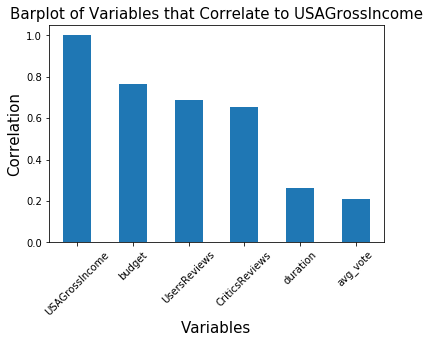

In [40]:
corr = USMoviesDf2.corr()
corr = corr.sort_values("USAGrossIncome", ascending=False)
corr["USAGrossIncome"].plot(kind='bar')
plt.title("Barplot of Variables that Correlate to USAGrossIncome", size=15)
plt.ylabel("Correlation", size=15)
plt.xlabel("Variables", size=15)
plt.xticks(rotation=45, size=10)

In [41]:
# Calculate Quartiles

# Create two new variables called Q1 and Q3--quartiles
filt2 = ['duration', 'UsersReviews', 'CriticsReviews', 'avg_vote', 'budget', 'USAGrossIncome']
USMoviesFilt = USMoviesDf2[filt2]

Q1 = USMoviesFilt.quantile(0.25)
print(Q1)

Q3 = USMoviesFilt.quantile(0.75)
print(Q3)

#(ii) Calculate the interquartile range (IQR = Q3 - Q1) for all columns in the dataframe and print it to the screen.
IQR = Q3-Q1
print(IQR)


duration          85.0
UsersReviews       8.0
CriticsReviews     3.0
avg_vote           4.8
budget             0.0
USAGrossIncome     0.0
Name: 0.25, dtype: float64
duration              102.00
UsersReviews           48.00
CriticsReviews         32.00
avg_vote                6.50
budget            1200000.00
USAGrossIncome      69144.75
Name: 0.75, dtype: float64
duration               17.00
UsersReviews           40.00
CriticsReviews         29.00
avg_vote                1.70
budget            1200000.00
USAGrossIncome      69144.75
dtype: float64


In [42]:
# Gauge outliers

#i. The number of entries in the original dataframe.
print ("i. When we did NOT removed any outliers from the dataset, we have " + str(len(USMoviesFilt.index))  + " entries/rows.") 

#ii. The number of entries if you were to remove the outliers.
removed_outliers = USMoviesFilt[~((USMoviesFilt < (Q1 - 1.5 * IQR)) |(USMoviesFilt > (Q3 + 1.5 * IQR))).any(axis=1)] #Bitwise operators!
print ("ii. After we removed outliers from the dataset, we have " + str(len(removed_outliers.index))  + " entries/rows.")

#iii. The proportion of outliers that exist in the dataset.
outliers = ((len(USMoviesFilt.index) - len(removed_outliers.index))/len(USMoviesFilt.index))*100
print ("iii. The proportion of outliers that exist when compared to the original dataframe is " + str(round(outliers,1)) + '%.')


i. When we did NOT removed any outliers from the dataset, we have 29712 entries/rows.
ii. After we removed outliers from the dataset, we have 19716 entries/rows.
iii. The proportion of outliers that exist when compared to the original dataframe is 33.6%.


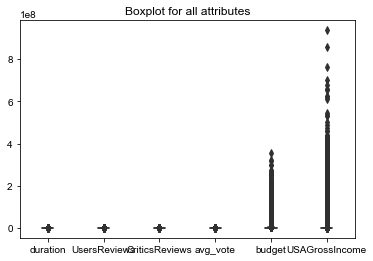

In [43]:
# Boxplot of all numerical attributes using seaborn
Boxplot = sns.boxplot(data=USMoviesFilt, width=0.2, palette="colorblind").set_title("Boxplot for all attributes")
Boxplot = sns.set(rc={'figure.figsize':(20,10)})


# Factor: LEAD ACTOR

In [44]:
#pip install sidetable
#6/2020: Pandas utility library called sidetable, which makes it easy to build a frequency table and simple summary of missing values at the start of exploratory analysis of a df.-Chris Moffitt 

import sidetable #stb


In [45]:
#Use .stb.freq() to build a FREQUENCY table to show how many votes were included with count, cumulative totals and percentages:
#Use the thresh argument to group all of the rest into an “Others” category--give countries that contributed 50% of total

# Get lead_actor and USA income for a film; threshold of 50% and put the rest of lead actors in 'Remaining'
Actor_Rev = USMoviesDf2.stb.freq(['lead_actor'], value='USAGrossIncome', thresh=50.0, other_label='Remaining')
Actor_Rev

,lead_actor,USAGrossIncome,percent,cumulative_USAGrossIncome,cumulative_percent
0,Robert Downey Jr.,4.234295e+09,1.663967,4.234295e+09,1.663967
1,Tom Hanks,4.143856e+09,1.628427,8.378151e+09,3.292393
2,Tom Cruise,3.302951e+09,1.297973,1.168110e+10,4.590367
3,Harrison Ford,2.996795e+09,1.177662,1.467790e+10,5.768029
4,Will Smith,2.816416e+09,1.106778,1.749431e+10,6.874806
...,...,...,...,...,...
101,Morgan Freeman,5.603291e+08,0.220195,1.253650e+11,49.265170
102,Felicity Jones,5.570780e+08,0.218917,1.259221e+11,49.484087
103,Andy Serkis,5.321859e+08,0.209135,1.264543e+11,49.693223
104,Wesley Snipes,5.232715e+08,0.205632,1.269776e+11,49.898855


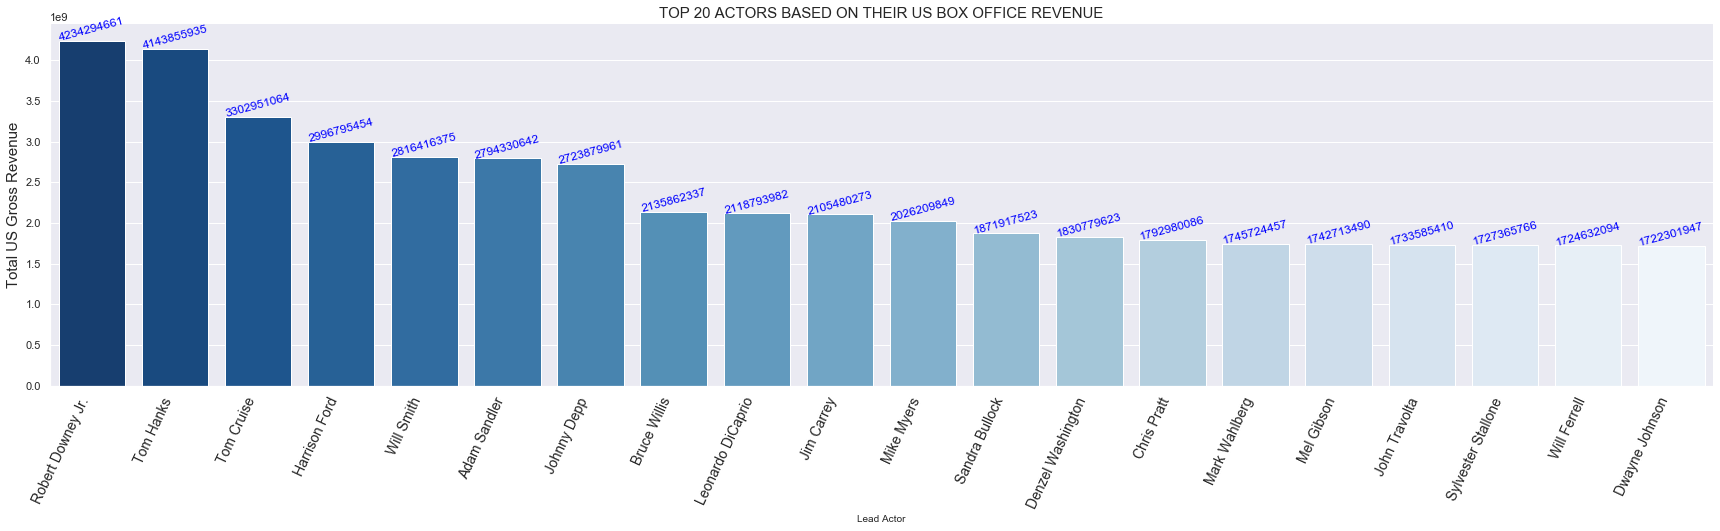

In [46]:
#Top 20 lead actors by USAGrossIncome
sns.catplot(x="lead_actor", y="USAGrossIncome", kind='bar', height=6, aspect=4, palette="Blues_r", data=Actor_Rev.iloc[0:20])
plt.xticks(rotation=65, horizontalalignment='right', fontsize=14)
plt.title('TOP 20 ACTORS BASED ON THEIR US BOX OFFICE REVENUE', fontsize=15)
plt.xlabel('Lead Actor', fontsize=10)
plt.ylabel('Total US Gross Revenue', fontsize=15)

# Get current axis on current figure
ax = plt.gca()

# Iterate through the list of axes' patches 
for p in ax.patches:  
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='blue', ha='center', va='baseline', rotation=15) #???use ('${:,d}'.format(int(t.get_text())))???

plt.show()

In [47]:
RDJr = USMoviesDf2[USMoviesDf2.lead_actor == 'Robert Downey Jr.']
RDJr


,year,decade,month,title,Writer1,Writer1Class,Director1,Director1Class,lead_actor,LeadActorClass,...,genre1Class,duration,UsersReviews,CriticsReviews,avg_vote,AvgVoteClass,budget,BudgetClass,USAGrossIncome,RevenueClass
22944,1988,1980s,11,1969,Ernest Thompson,2,Ernest Thompson,2,Robert Downey Jr.,2,...,1,95.0,31.0,16.0,5.8,Maybe,0.0,nan,5979011.0,<=$100M
26530,1993,1990s,8,Heart and Souls,Gregory Hansen,2,Ron Underwood,2,Robert Downey Jr.,2,...,6,104.0,77.0,18.0,6.9,Maybe,25000000.0,<=$100M,16589540.0,<=$100M
28432,1995,1990s,2,Restoration,Rose Tremain,2,Michael Hoffman,2,Robert Downey Jr.,2,...,2,117.0,49.0,28.0,6.6,Maybe,19000000.0,<=$100M,4005941.0,<=$100M
40494,2003,2000s,11,The Singing Detective,Dennis Potter,1,Keith Gordon,1,Robert Downey Jr.,1,...,6,109.0,79.0,64.0,5.5,Maybe,8000000.0,<=$100M,337174.0,<=$1M
42619,2008,2000s,5,Iron Man,Mark Fergus,4,Jon Favreau,4,Robert Downey Jr.,4,...,9,126.0,1250.0,526.0,7.9,See!,140000000.0,<=$250,318604126.0,<=$500M
42693,2005,2000s,11,Kiss Kiss Bang Bang,Brett Halliday,2,Shane Black,2,Robert Downey Jr.,2,...,9,103.0,367.0,240.0,7.5,See!,15000000.0,<=$100M,4243756.0,<=$100M
49418,2012,2010s,4,The Avengers,Joss Whedon,5,Joss Whedon,5,Robert Downey Jr.,5,...,9,143.0,1859.0,738.0,8.0,See!,220000000.0,<=$250,623357910.0,>$500M
50719,2009,2000s,12,Sherlock Holmes,Michael Robert Johnson,3,Guy Ritchie,3,Robert Downey Jr.,3,...,9,128.0,667.0,423.0,7.6,See!,90000000.0,<=$100M,209028679.0,<=$250
53538,2010,2010s,4,Iron Man 2,Justin Theroux,4,Jon Favreau,4,Robert Downey Jr.,4,...,9,124.0,821.0,483.0,7.0,Maybe,200000000.0,<=$250,312433331.0,<=$500M
53597,2010,2010s,11,Due Date,Alan R. Cohen,3,Todd Phillips,3,Robert Downey Jr.,3,...,8,95.0,309.0,311.0,6.5,Maybe,65000000.0,<=$100M,100539043.0,<=$250


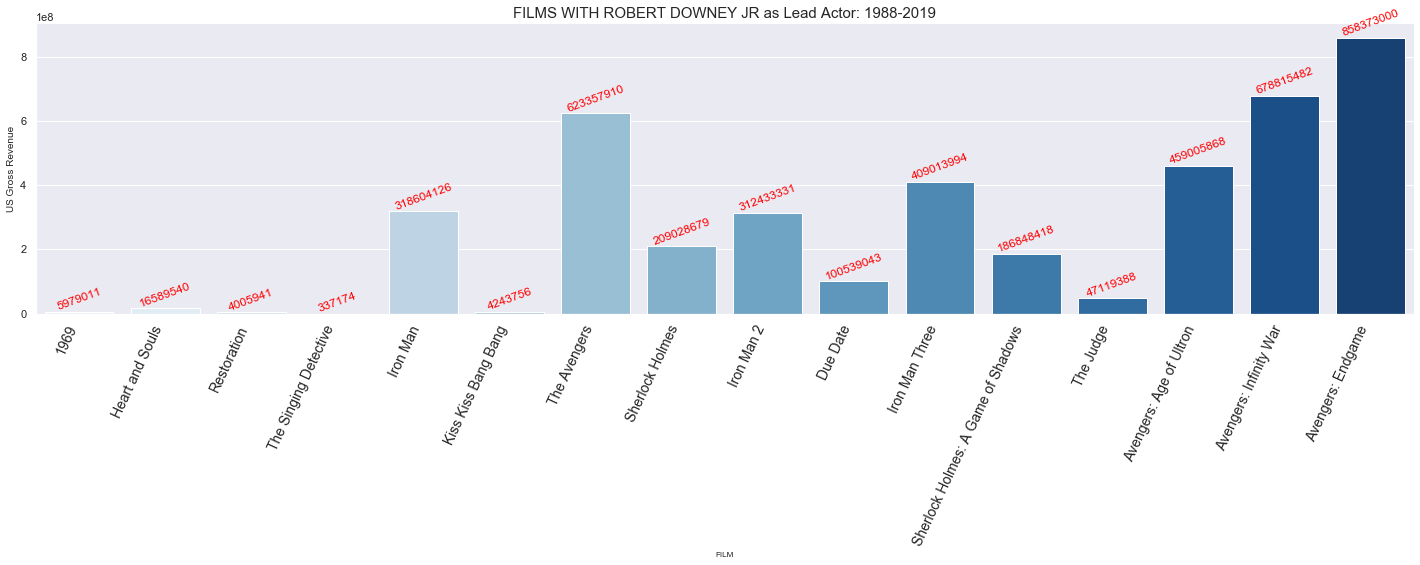

In [48]:
# Films with Downey Jr as lead actor
sns.catplot(x="title", y="USAGrossIncome", kind='bar', height=5, aspect=4, palette="Blues", data=RDJr)
plt.xticks(rotation=65, horizontalalignment='right', fontsize=14)
plt.title('FILMS WITH ROBERT DOWNEY JR as Lead Actor: 1988-2019', fontsize=15)
plt.xlabel('FILM', fontsize=8)
plt.ylabel('US Gross Revenue', fontsize=10)

# Get current axis on current figure
ax = plt.gca()

# Iterate through the list of axes' patches--adding annotation to bars
for p in ax.patches: 
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='red', ha='center', va='bottom', rotation=20)

plt.show()


### LEAD ACTOR INSIGHT
The top billed actor in a movie could determine the success of a film. Robert Downey Jr. is the top actor whose films have made over $4.2B in the US market. He is followed by Tom Hanks, Tom Cruise, Harrison Ford, and Will Smith to round out the top 5 grossing actors. Downey Jr. was lead actor in 16 films between 1988 and 2019.  His major hits were action films while his drama, biography and comedy films only had mild successes.




# FACTOR: GENRE

In [49]:
Genre1_Rev = USMoviesDf2.stb.freq(['genre1'], value='USAGrossIncome')
Genre1_Rev.head(22)

,genre1,USAGrossIncome,percent,cumulative_USAGrossIncome,cumulative_percent
0,Action,8.674508e+10,34.088540,8.674508e+10,34.088540
1,Comedy,6.204933e+10,24.383759,1.487944e+11,58.472299
2,Animation,2.934830e+10,11.533112,1.781427e+11,70.005411
3,Drama,2.858049e+10,11.231384,2.067232e+11,81.236795
4,Adventure,1.474656e+10,5.795011,2.214698e+11,87.031805
5,Crime,1.054770e+10,4.144969,2.320175e+11,91.176774
6,Biography,9.426518e+09,3.704374,2.414440e+11,94.881149
7,Horror,9.219929e+09,3.623190,2.506639e+11,98.504339
8,Family,1.132881e+09,0.445193,2.517968e+11,98.949531
9,Mystery,1.086931e+09,0.427135,2.528837e+11,99.376666


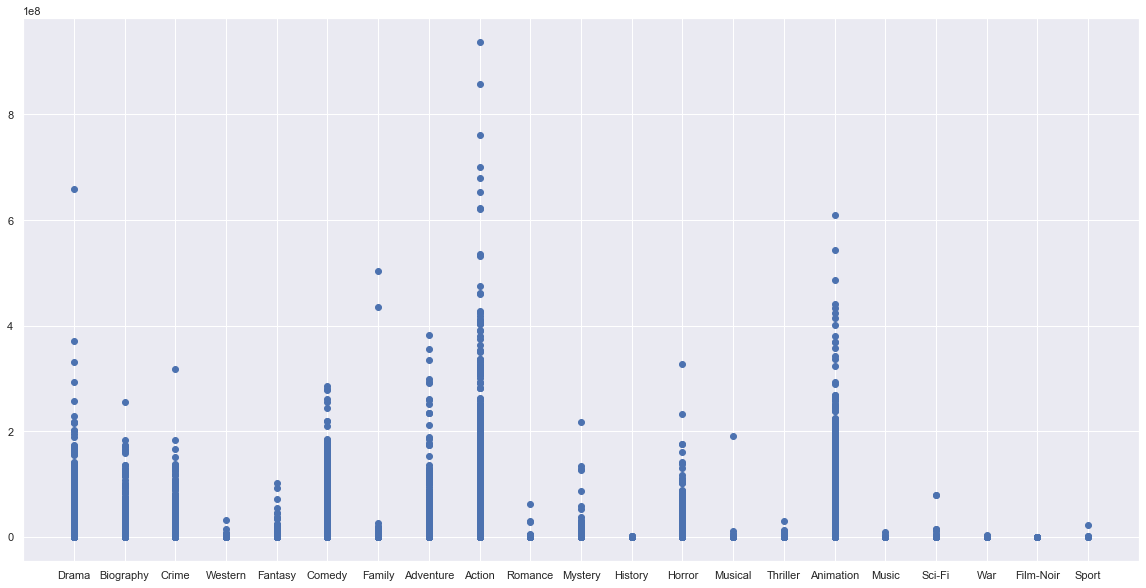

In [50]:
#Correlation: genre1 vs USAGrossIncome
plt.scatter(USMoviesDf2['genre1'], USMoviesDf2['USAGrossIncome'])


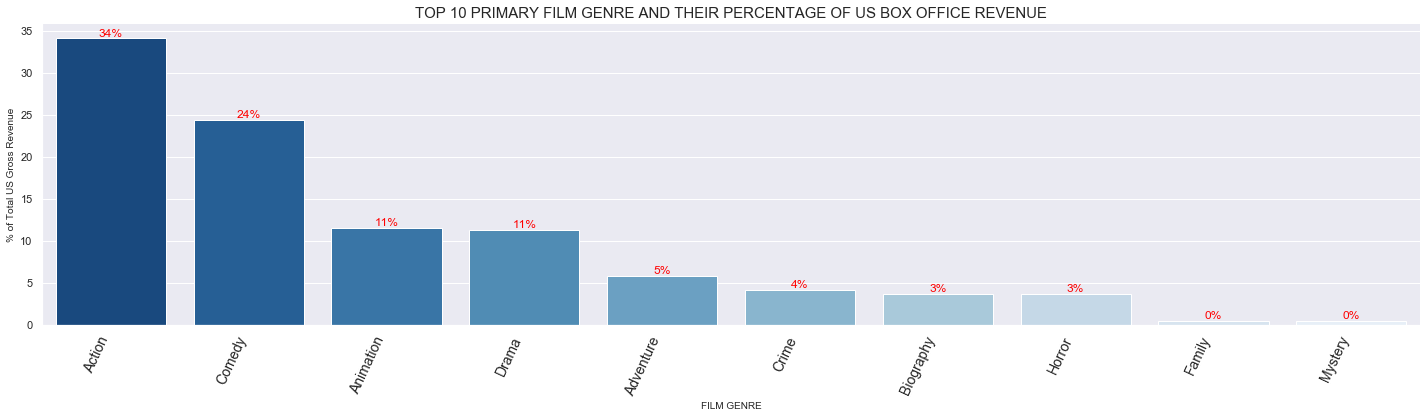

In [51]:
sns.catplot(x="genre1", y="percent", kind='bar', height=5, aspect=4, palette="Blues_r", data=Genre1_Rev.iloc[0:10])
plt.xticks(rotation=65, horizontalalignment='right', fontsize=14)
plt.title('TOP 10 PRIMARY FILM GENRE AND THEIR PERCENTAGE OF US BOX OFFICE REVENUE', fontsize=15)
plt.xlabel('FILM GENRE', fontsize=10)
plt.ylabel('% of Total US Gross Revenue', fontsize=10)

# Get current axis on current figure
ax = plt.gca()

# Iterate through the list of axes' patches
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()) + "%", 
            fontsize=12, color='red', ha='center', va='bottom')

plt.show()

# FACTOR: RELEASE MONTH

In [52]:
Month_Rev = USMoviesDf2.stb.freq(['month'], value='USAGrossIncome')
Month_Rev


,month,USAGrossIncome,percent,cumulative_USAGrossIncome,cumulative_percent
0,7,2.812977e+10,11.054260,2.812977e+10,11.054260
1,12,2.551587e+10,10.027068,5.364564e+10,21.081328
2,3,2.434390e+10,9.566514,7.798954e+10,30.647842
3,8,2.311204e+10,9.082424,1.011016e+11,39.730266
4,10,2.246891e+10,8.829693,1.235705e+11,48.559959
5,4,2.112418e+10,8.301250,1.446947e+11,56.861209
6,6,2.083272e+10,8.186711,1.655274e+11,65.047920
7,5,1.993740e+10,7.834876,1.854648e+11,72.882796
8,2,1.904995e+10,7.486129,2.045147e+11,80.368924
9,1,1.754098e+10,6.893145,2.220557e+11,87.262069


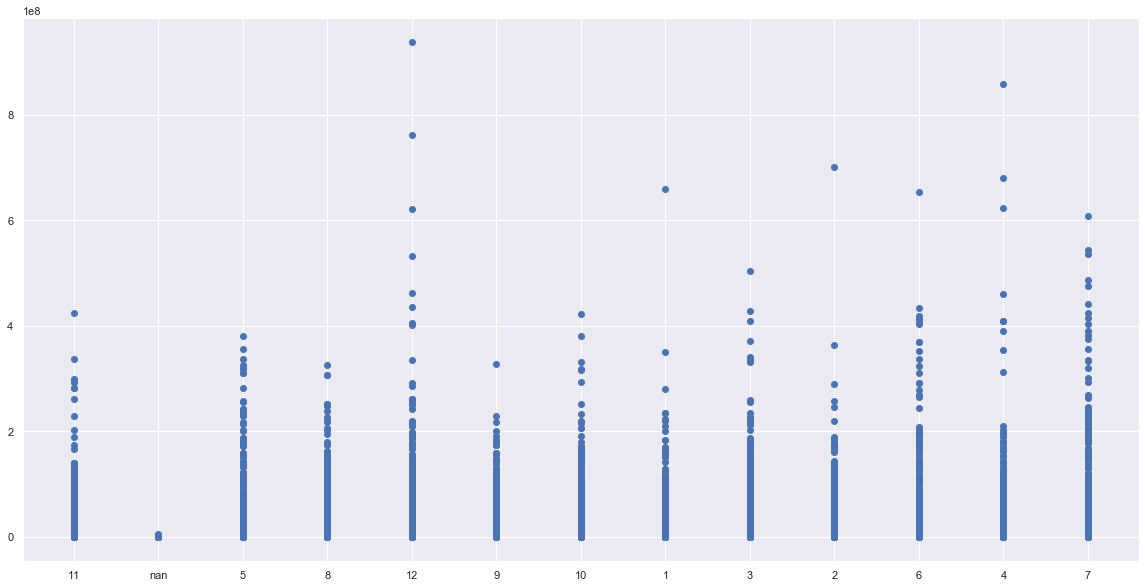

In [53]:
#Correlation: month vs USAGrossIncome
plt.scatter(USMoviesDf2['month'], USMoviesDf2['USAGrossIncome'])


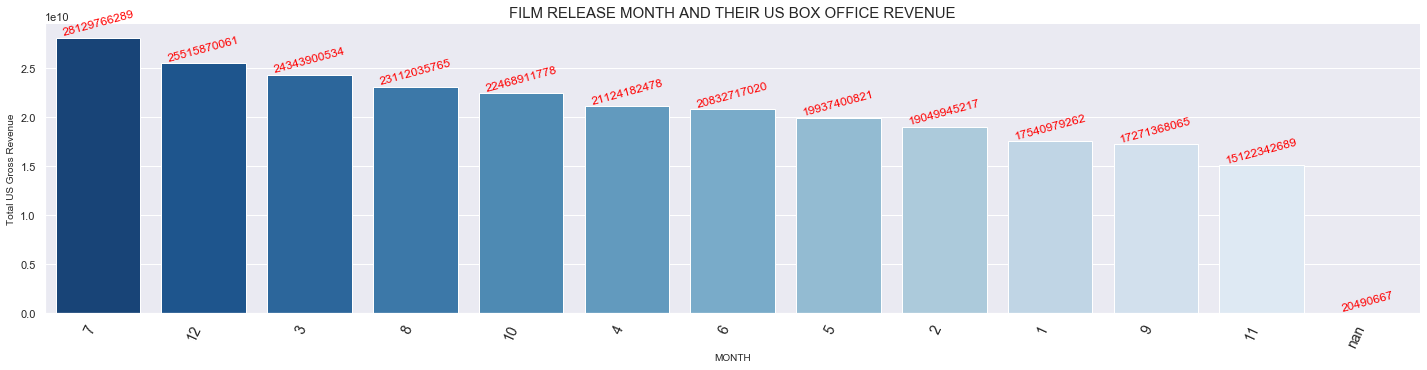

In [54]:
sns.catplot(x="month", y="USAGrossIncome", kind='bar', height=5, aspect=4, palette="Blues_r", data=Month_Rev, order=Month_Rev.sort_values('USAGrossIncome',ascending = False).month)
plt.xticks(rotation=65, horizontalalignment='right', fontsize=14)
plt.title('FILM RELEASE MONTH AND THEIR US BOX OFFICE REVENUE', fontsize=15)
plt.xlabel('MONTH', fontsize=10)
plt.ylabel('Total US Gross Revenue', fontsize=10)

# Get current axis on current figure
ax = plt.gca()

# Iterate through the list of axes' patches
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='red', ha='center', va='bottom', rotation=15)

plt.show()

### FILM RELEASE MONTH INSIGHT
It may not matter much when a film is release.  However, data shows films released in July, December and March pulled in the most revenue historically. July and December releases are popular since they are tied to summer and Christmas times that traditionally saw high movie attendance. It seems film releases in other months had also done relatively well.


# FACTOR: BUDGET

In [55]:
Budget_Rev = USMoviesDf2.stb.freq(['BudgetClass'], value='USAGrossIncome')
Budget_Rev


,BudgetClass,USAGrossIncome,percent,cumulative_USAGrossIncome,cumulative_percent
0,<=$100M,1.735531e+11,68.201830,1.735531e+11,68.201830
1,<=$250,5.773081e+10,22.686695,2.312839e+11,90.888525
2,nan,1.721962e+10,6.766859,2.485036e+11,97.655384
3,<=$500M,4.190512e+09,1.646761,2.526941e+11,99.302145
4,<=$1M,1.775830e+09,0.697855,2.544699e+11,100.000000


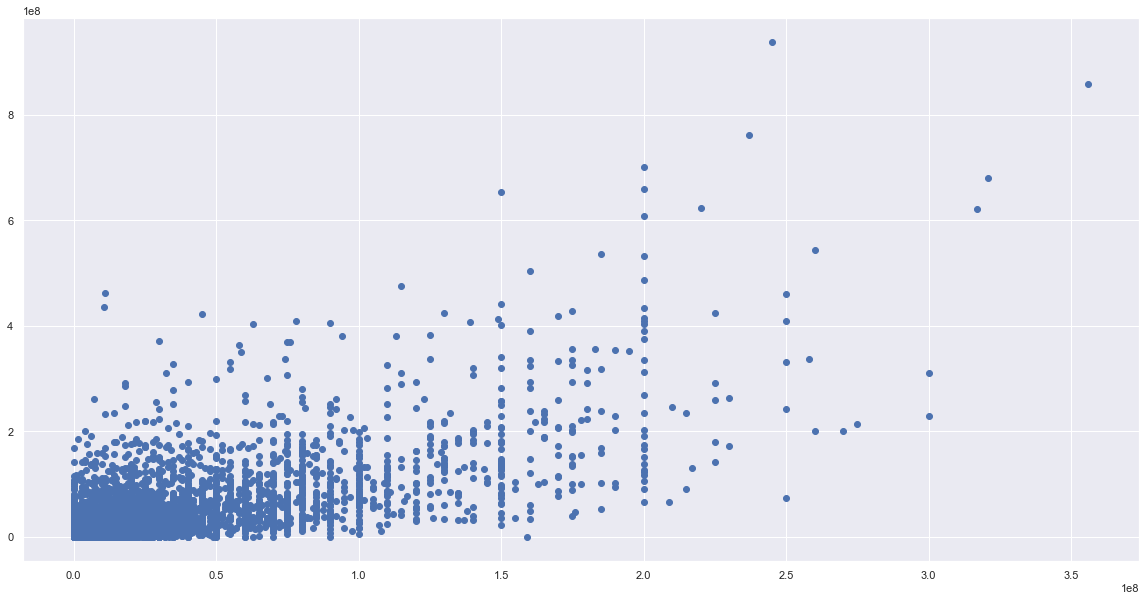

In [56]:
#Correlation: budget vs USAGrossIncome
plt.scatter(USMoviesDf2['budget'], USMoviesDf2['USAGrossIncome'])


#### Scatter plot shows a moderate, positive, linear relationship between budget and income.

In [57]:
print(USMoviesDf2.loc[USMoviesDf2['BudgetClass'] == '>$500M']) 
# No movie had a budget exceeding $500M. 

USMoviesDf2.loc[USMoviesDf2['BudgetClass'] == '<=$500M'].sort_values(by='USAGrossIncome', ascending=False) 
# 10 films had a budget of $250-$500M and the highest budgeted film is Avengers: Endgame at $356M.


Empty DataFrame
Columns: [year, decade, month, title, Writer1, Writer1Class, Director1, Director1Class, lead_actor, LeadActorClass, genre1, genre1Class, duration, UsersReviews, CriticsReviews, avg_vote, AvgVoteClass, budget, BudgetClass, USAGrossIncome, RevenueClass]
Index: []

[0 rows x 21 columns]


,year,decade,month,title,Writer1,Writer1Class,Director1,Director1Class,lead_actor,LeadActorClass,...,genre1Class,duration,UsersReviews,CriticsReviews,avg_vote,AvgVoteClass,budget,BudgetClass,USAGrossIncome,RevenueClass
71243,2019,2010s,4,Avengers: Endgame,Christopher Markus,5,Anthony Russo,5,Robert Downey Jr.,5,...,9,181.0,8302.0,531.0,8.5,See!,356000000.0,<=$500M,858373000.0,>$500M
71242,2018,2010s,4,Avengers: Infinity War,Christopher Markus,5,Anthony Russo,5,Robert Downey Jr.,5,...,9,149.0,4111.0,591.0,8.5,See!,321000000.0,<=$500M,678815482.0,>$500M
65276,2017,2010s,12,Star Wars: Episode VIII - The Last Jedi,Rian Johnson,5,Rian Johnson,5,Mark Hamill,5,...,9,152.0,6218.0,690.0,7.1,See!,317000000.0,<=$500M,620181382.0,>$500M
76606,2019,2010s,7,The Lion King,Jeff Nathanson,5,Jon Favreau,5,Chiwetel Ejiofor,5,...,16,118.0,2445.0,339.0,7.0,Maybe,260000000.0,<=$500M,543496835.0,>$500M
44344,2007,2000s,5,Spider-Man 3,Sam Raimi,4,Sam Raimi,4,Tobey Maguire,4,...,9,139.0,2011.0,413.0,6.2,Maybe,258000000.0,<=$500M,336530303.0,<=$500M
45864,2007,2000s,5,Pirates of the Caribbean: At World's End,Ted Elliott,4,Gore Verbinski,4,Johnny Depp,4,...,9,169.0,1272.0,324.0,7.1,See!,300000000.0,<=$500M,309420425.0,<=$500M
50575,2017,2010s,11,Justice League,Jerry Siegel,3,Zack Snyder,3,Ben Affleck,3,...,9,120.0,1906.0,475.0,6.4,Maybe,300000000.0,<=$500M,229024295.0,<=$250
70054,2018,2010s,5,Solo: A Star Wars Story,Jonathan Kasdan,3,Ron Howard,3,Alden Ehrenreich,3,...,9,135.0,2342.0,529.0,6.9,Maybe,275000000.0,<=$500M,213767512.0,<=$250
43793,2010,2010s,1,Tangled,Dan Fogelman,3,Nathan Greno,3,Mandy Moore,3,...,16,100.0,445.0,337.0,7.7,See!,260000000.0,<=$500M,200821936.0,<=$250
41702,2006,2000s,7,Superman Returns,Michael Dougherty,3,Bryan Singer,3,Brandon Routh,3,...,9,154.0,2399.0,443.0,6.0,Maybe,270000000.0,<=$500M,200081192.0,<=$250


In [58]:
# Count movies by budget class
USMoviesDf2.BudgetClass.value_counts(normalize=True, dropna=True)

# 40% of films in USMoviesDf2 have budget amounts

nan        0.608912
<=$100M    0.243639
<=$1M      0.136645
<=$250     0.010467
<=$500M    0.000337
Name: BudgetClass, dtype: float64

In [59]:
USMoviesDf2.BudgetClass.describe()

count     29712
unique        5
top         nan
freq      18092
Name: BudgetClass, dtype: object

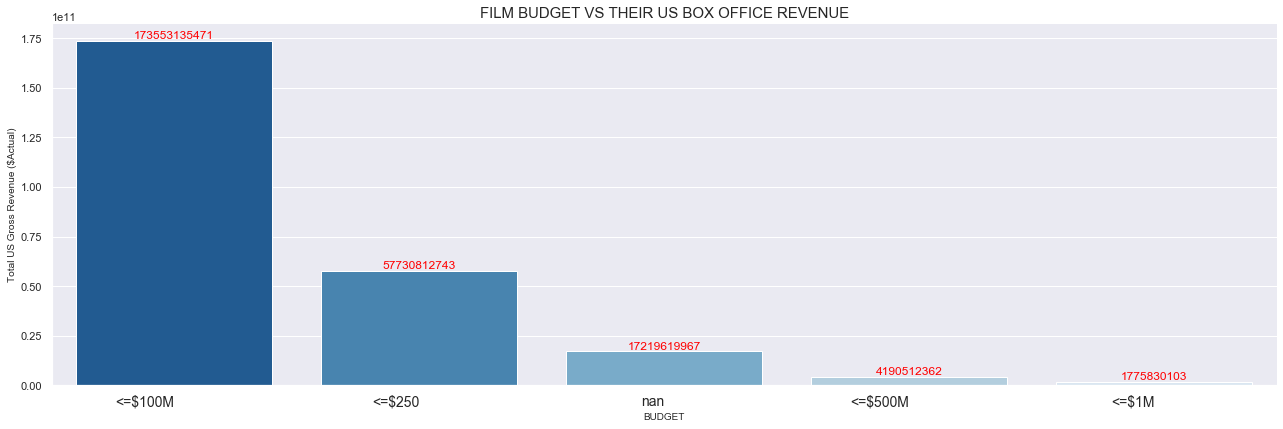

In [60]:
sns.catplot(x="BudgetClass", y="USAGrossIncome", kind='bar', height=6, aspect=3, palette="Blues_r", data=Budget_Rev, order=Budget_Rev.sort_values('USAGrossIncome',ascending = False).BudgetClass)
plt.xticks(rotation=0, horizontalalignment='right', fontsize=14)
plt.title('FILM BUDGET VS THEIR US BOX OFFICE REVENUE', fontsize=15)
plt.xlabel('BUDGET', fontsize=10)
plt.ylabel('Total US Gross Revenue ($Actual)', fontsize=10)

# Get current axis on current figure
ax = plt.gca()

# Iterate through the list of axes' patches
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='red', ha='center', va='bottom', rotation=0)

plt.show()

# FACTOR: AVERAGE USER VOTES

In [61]:
# How do average user reviews correlate to US revenue?
AvgVote_Rev = USMoviesDf2.stb.freq(['AvgVoteClass'], value='USAGrossIncome')
AvgVote_Rev


,AvgVoteClass,USAGrossIncome,percent,cumulative_USAGrossIncome,cumulative_percent
0,Maybe,1.605466e+11,63.090615,1.605466e+11,63.090615
1,See!,9.153805e+10,35.972053,2.520847e+11,99.062668
2,Pass,2.385228e+09,0.937332,2.544699e+11,100.000000


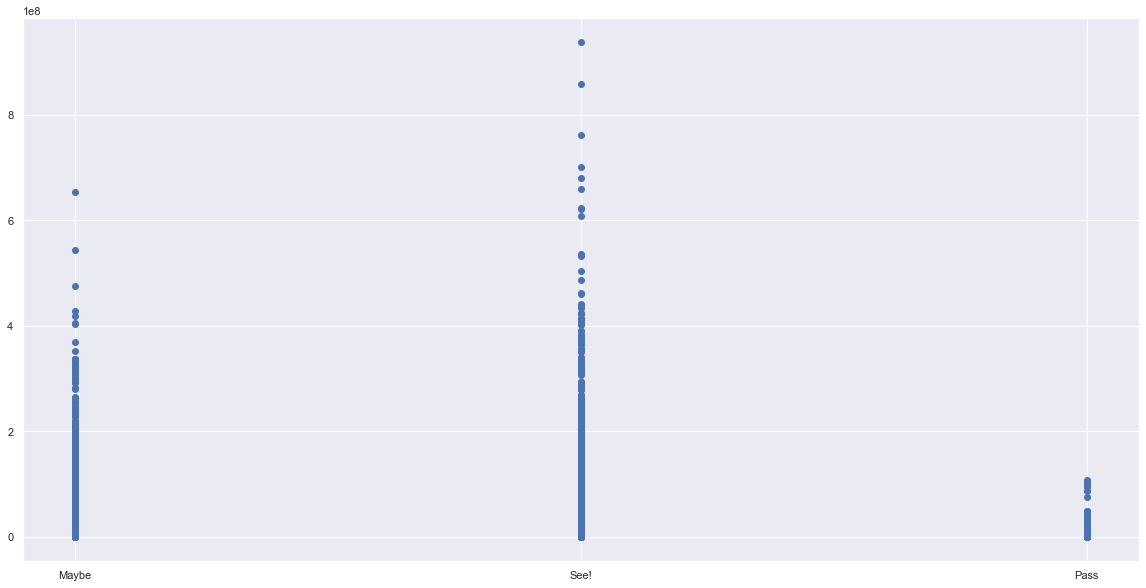

In [62]:
#Correlation: AvgVoteClass vs USAGrossIncome
plt.scatter(USMoviesDf2['AvgVoteClass'], USMoviesDf2['USAGrossIncome'])


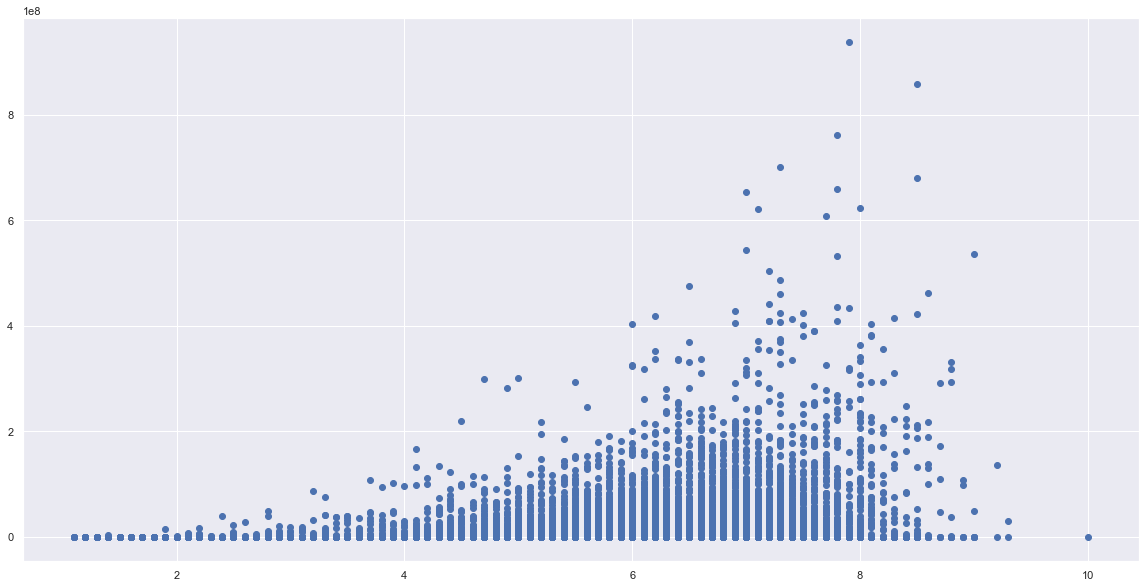

In [63]:
#Correlation: avg_vote vs USAGrossIncome
plt.scatter(USMoviesDf2['avg_vote'], USMoviesDf2['USAGrossIncome'])


#### Scatter plot shows a positive, linear, moderate relationship between avg_vote and income.

In [64]:
# Count movies by AvgVoteClass
USMoviesDf2.AvgVoteClass.value_counts(dropna=True)


Maybe    22693
Pass      3985
See!      3034
Name: AvgVoteClass, dtype: int64

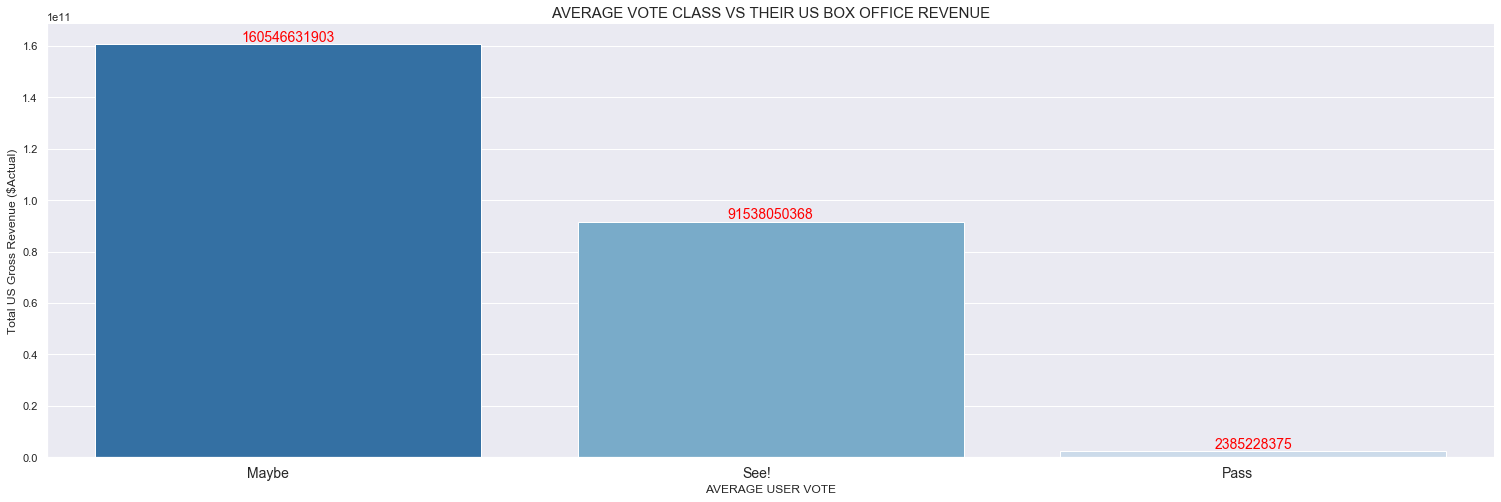

In [65]:
sns.catplot(x="AvgVoteClass", y="USAGrossIncome", kind='bar', height=7, aspect=3, palette="Blues_r", data=AvgVote_Rev, order=AvgVote_Rev.sort_values('USAGrossIncome',ascending = False).AvgVoteClass)
plt.xticks(rotation=0, horizontalalignment='right', fontsize=14)
plt.title('AVERAGE VOTE CLASS VS THEIR US BOX OFFICE REVENUE', fontsize=15)
plt.xlabel('AVERAGE USER VOTE', fontsize=12)
plt.ylabel('Total US Gross Revenue ($Actual)', fontsize=12)

# Get current axis on current figure
ax = plt.gca()

# Iterate through the list of axes' patches
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=14, color='red', ha='center', va='bottom', rotation=0)

plt.show()

# FACTOR: DURATION

In [66]:
#add a new column DurationClass next to duration, which is split into 5 bins
category4 = pd.cut(USMoviesDf2.duration,bins=[0,60,90,120,180,400],labels=['<=60min','<=90min','<=120min','<=180min','>180min'])
USMoviesDf2.insert(12,'DurationClass',category4)
USMoviesDf2.head()

,year,decade,month,title,Writer1,Writer1Class,Director1,Director1Class,lead_actor,LeadActorClass,...,DurationClass,duration,UsersReviews,CriticsReviews,avg_vote,AvgVoteClass,budget,BudgetClass,USAGrossIncome,RevenueClass
2,1912,1910s,11,Cleopatra,Victorien Sardou,5,Charles L. Gaskill,5,Helen Gardner,5,...,<=120min,100.0,24.0,3.0,5.2,Maybe,45000.0,<=$1M,0.0,nan
4,1912,1910s,nan,"From the Manger to the Cross; or, Jesus of Naz...",Gene Gauntier,5,Sidney Olcott,5,R. Henderson Bland,5,...,<=60min,60.0,12.0,5.0,5.7,Maybe,0.0,nan,0.0,nan
15,1914,1910s,5,"Home, Sweet Home",D.W. Griffith,5,D.W. Griffith,5,Henry B. Walthall,5,...,<=60min,55.0,6.0,0.0,5.7,Maybe,0.0,nan,0.0,nan
17,1913,1910s,11,Traffic in Souls,nan,5,George Loane Tucker,5,Jane Gail,5,...,<=90min,88.0,13.0,10.0,6.1,Maybe,5700.0,<=$1M,0.0,nan
20,1914,1910s,8,The Avenging Conscience: or 'Thou Shalt Not Kill',Edgar Allan Poe,5,D.W. Griffith,5,Henry B. Walthall,5,...,<=90min,78.0,14.0,11.0,6.5,Maybe,0.0,nan,0.0,nan


In [67]:
# How does duration of a film correlate to US revenue?

# Number of films grouped by count of duration class
Duration_Count = USMoviesDf2.stb.freq(['DurationClass'])
print(Duration_Count)

# Gross revenue grouped by duration class by gross income
Duration_Rev = USMoviesDf2.stb.freq(['DurationClass'], value='USAGrossIncome')
Duration_Rev

  DurationClass  count    percent  cumulative_count  cumulative_percent
0      <=120min  14537  48.926360             14537           48.926360
1       <=90min  12895  43.399973             27432           92.326333
2      <=180min   1665   5.603796             29097           97.930129
3       <=60min    500   1.682822             29597           99.612951
4       >180min    115   0.387049             29712          100.000000


,DurationClass,USAGrossIncome,percent,cumulative_USAGrossIncome,cumulative_percent
0,<=120min,1.451586e+11,57.043538,1.451586e+11,57.043538
1,<=180min,7.978381e+10,31.352945,2.249425e+11,88.396483
2,<=90min,2.644449e+10,10.391992,2.513869e+11,98.788474
3,>180min,2.978964e+09,1.170655,2.543659e+11,99.959129
4,<=60min,1.040046e+08,0.040871,2.544699e+11,100.000000


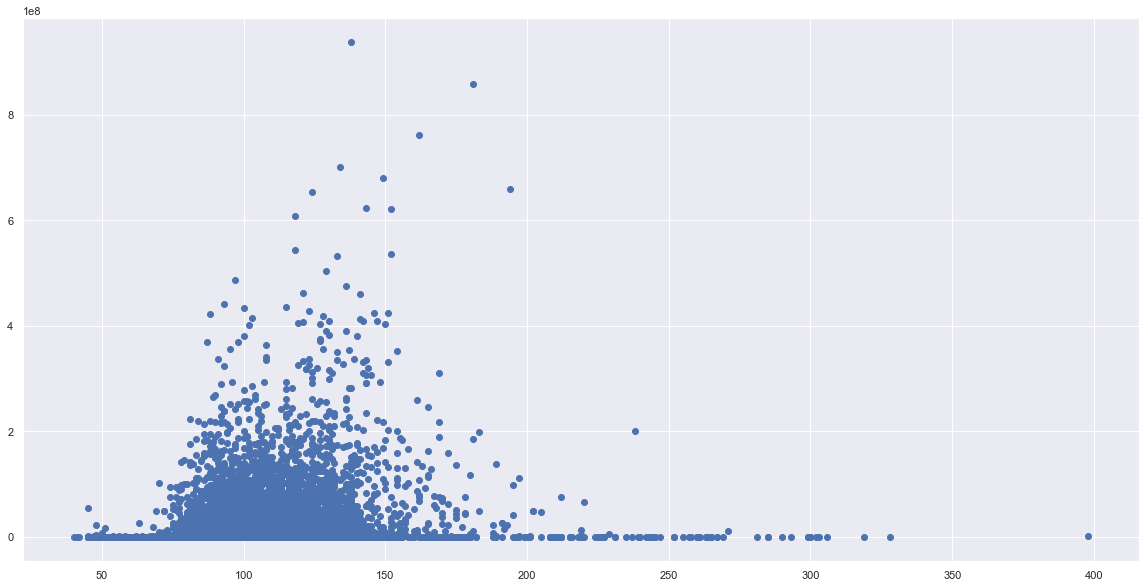

In [68]:
#Correlation: duration vs USAGrossIncome
plt.scatter(USMoviesDf2['duration'], USMoviesDf2['USAGrossIncome'])


### Scatter plot shows a positive, linear, moderate relationship between duration and income.

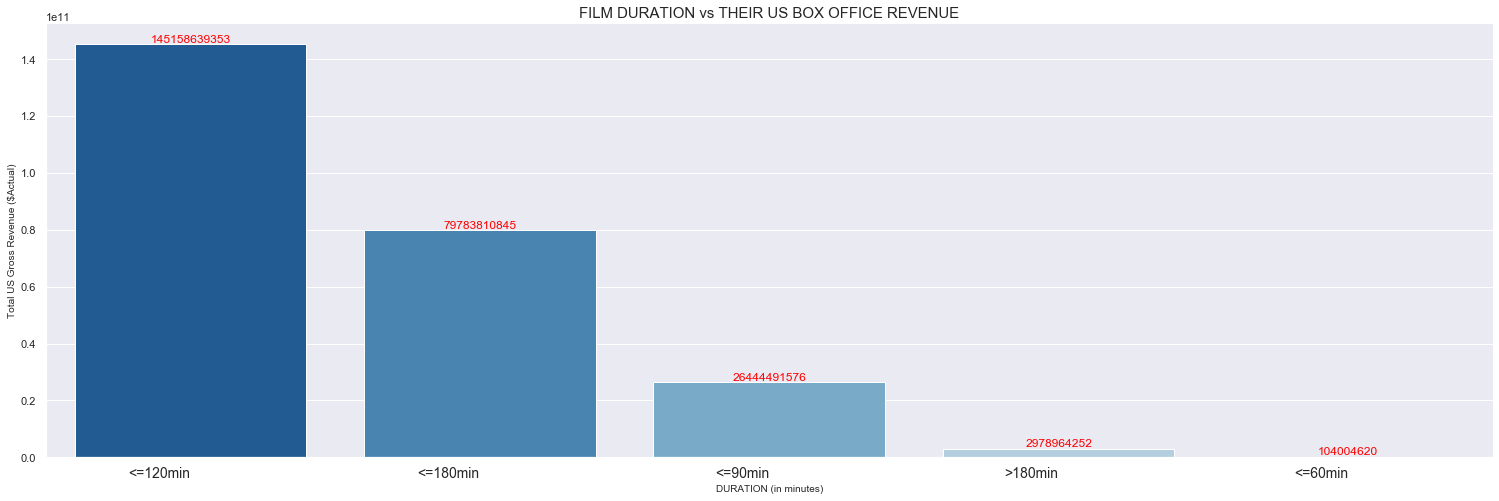

In [69]:
sns.catplot(x="DurationClass", y="USAGrossIncome", kind='bar', height=7, aspect=3, palette="Blues_r", data=Duration_Rev, order=Duration_Rev.sort_values('USAGrossIncome',ascending = False).DurationClass)
plt.xticks(rotation=0, horizontalalignment='right', fontsize=14)
plt.title('FILM DURATION vs THEIR US BOX OFFICE REVENUE', fontsize=15)
plt.xlabel('DURATION (in minutes)', fontsize=10)
plt.ylabel('Total US Gross Revenue ($Actual)', fontsize=10)

# Get current axis on current figure
ax = plt.gca()

# Iterate through the list of axes' patches
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % (p.get_height()), 
            fontsize=12, color='red', ha='center', va='bottom', rotation=0)

plt.show()

# FACTOR: LEAD DIRECTOR

In [70]:
#How does director correlate with gross revenue?

# Number of films grouped by director
Director_Count = USMoviesDf2.stb.freq(['Director1'])
print(Director_Count.head(10))

# Get 1stDirector and USA income for a film; threshold of 50% and put the rest of directors in 'Remaining'
Director_Rev = USMoviesDf2.stb.freq(['Director1'], value='USAGrossIncome', thresh=50.0, other_label='Remaining')
Director_Rev.head(10)


            Director1  count   percent  cumulative_count  cumulative_percent
0      Michael Curtiz     89  0.299542                89            0.299542
1         Lloyd Bacon     77  0.259155               166            0.558697
2           John Ford     70  0.235595               236            0.794292
3    William Beaudine     69  0.232229               305            1.026521
4      Gordon Douglas     66  0.222132               371            1.248654
5      Richard Thorpe     64  0.215401               435            1.464055
6     Lesley Selander     64  0.215401               499            1.679456
7        Mervyn LeRoy     63  0.212036               562            1.891492
8       Norman Taurog     58  0.195207               620            2.086699
9  William A. Wellman     56  0.188476               676            2.275175


,Director1,USAGrossIncome,percent,cumulative_USAGrossIncome,cumulative_percent
0,Steven Spielberg,4.388392e+09,1.724523,4.388392e+09,1.724523
1,Anthony Russo,2.281004e+09,0.896375,6.669396e+09,2.620898
2,Michael Bay,2.273656e+09,0.893487,8.943052e+09,3.514385
3,Ron Howard,2.061266e+09,0.810023,1.100432e+10,4.324408
4,Robert Zemeckis,1.978715e+09,0.777583,1.298303e+10,5.101992
5,James Cameron,1.911656e+09,0.751231,1.489469e+10,5.853222
6,Clint Eastwood,1.808007e+09,0.710500,1.670270e+10,6.563722
7,George Lucas,1.743928e+09,0.685318,1.844662e+10,7.249040
8,J.J. Abrams,1.684205e+09,0.661848,2.013083e+10,7.910888
9,Tim Burton,1.648212e+09,0.647704,2.177904e+10,8.558592


In [71]:
#Correlation: 1stDirector vs USAGrossIncome
#plt.scatter(USMoviesDf2['Director1'], USMoviesDf2['USAGrossIncome'])
# TOO SLOW TO RUN THIS QUERY--NO RESULT AFTER 6 MINS!

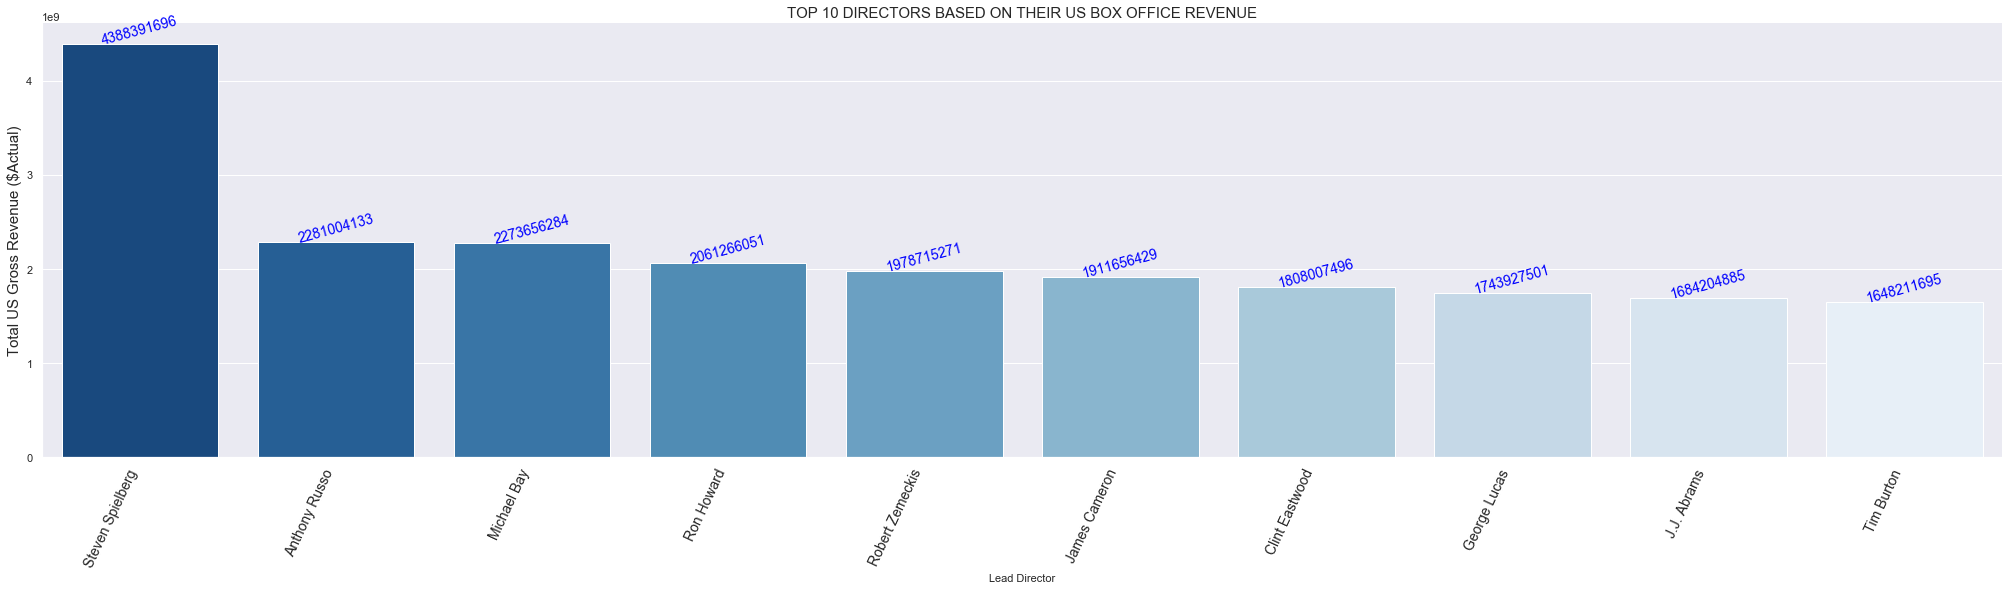

In [72]:
sns.catplot(x="Director1", y="USAGrossIncome", kind='bar', height=7, aspect=4, palette="Blues_r", data=Director_Rev.iloc[0:10])
plt.xticks(rotation=65, horizontalalignment='right', fontsize=14)
plt.title('TOP 10 DIRECTORS BASED ON THEIR US BOX OFFICE REVENUE', fontsize=15)
plt.xlabel('Lead Director', fontsize=11)
plt.ylabel('Total US Gross Revenue ($Actual)', fontsize=15)

# Get current axis on current figure
ax = plt.gca()

# Iterate through the list of axes' patches 
for p in ax.patches:  
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=14, color='blue', ha='center', va='baseline', rotation=15) 
    
plt.show()


In [73]:
Spielberg = USMoviesDf2[USMoviesDf2['Director1'] == 'Steven Spielberg']
Spielberg.head()


,year,decade,month,title,Writer1,Writer1Class,Director1,Director1Class,lead_actor,LeadActorClass,...,DurationClass,duration,UsersReviews,CriticsReviews,avg_vote,AvgVoteClass,budget,BudgetClass,USAGrossIncome,RevenueClass
11693,1964,1960s,3,Firelight,Steven Spielberg,5,Steven Spielberg,5,Robert Robyn,5,...,<=180min,140.0,2.0,1.0,5.6,Maybe,400.0,<=$1M,0.0,nan
16178,1974,1970s,11,The Sugarland Express,Hal Barwood,2,Steven Spielberg,2,Goldie Hawn,2,...,<=120min,110.0,71.0,64.0,6.8,Maybe,3000000.0,<=$100M,7500000.0,<=$100M
16457,1975,1970s,12,Jaws,Peter Benchley,4,Steven Spielberg,4,Roy Scheider,4,...,<=180min,124.0,1150.0,282.0,8.0,See!,7000000.0,<=$100M,260000000.0,<=$500M
17274,1977,1970s,3,Close Encounters of the Third Kind,Steven Spielberg,3,Steven Spielberg,3,Richard Dreyfuss,3,...,<=180min,138.0,410.0,220.0,7.6,See!,20000000.0,<=$100M,135189114.0,<=$250
18116,1979,1970s,12,1941,Robert Zemeckis,2,Steven Spielberg,2,Dan Aykroyd,2,...,<=120min,118.0,237.0,68.0,5.8,Maybe,35000000.0,<=$100M,31755742.0,<=$100M


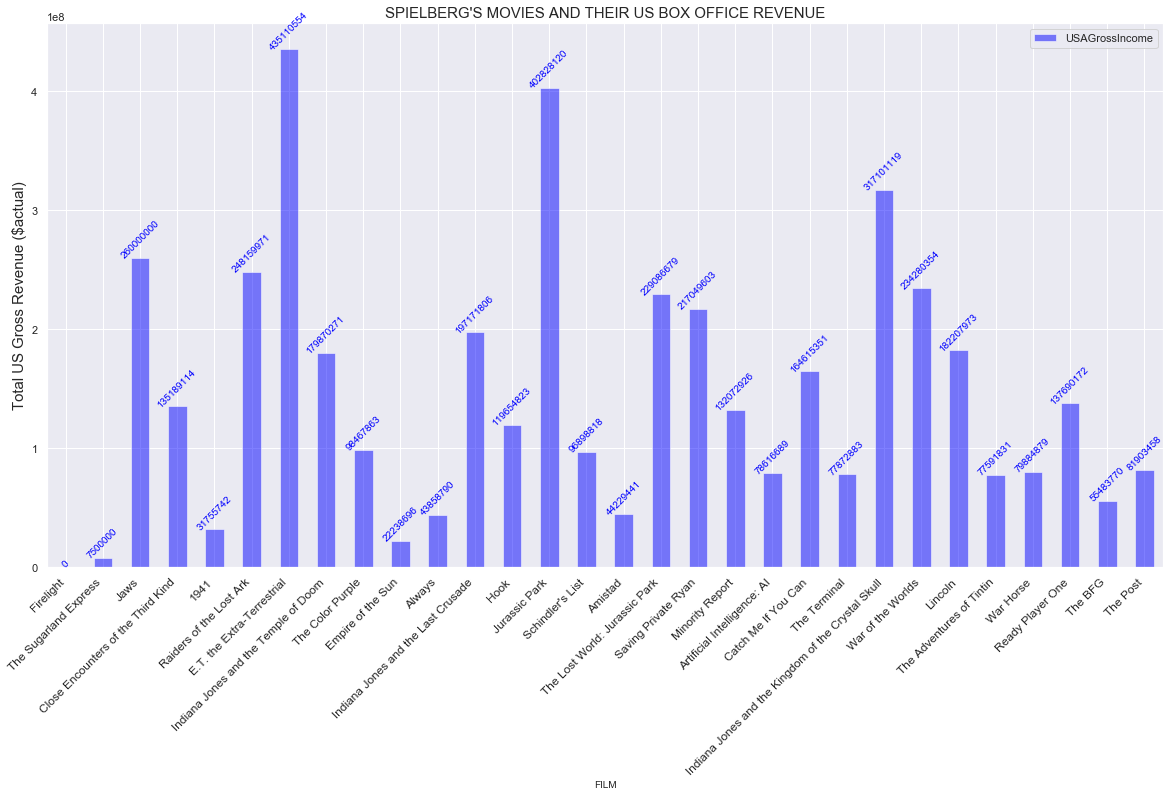

In [74]:
Spielberg.plot(x='title', y='USAGrossIncome', kind='bar', color='blue', alpha=.5, figsize=(20,10))
plt.xticks(horizontalalignment='right', fontsize=12, rotation=45)
plt.title("SPIELBERG'S MOVIES AND THEIR US BOX OFFICE REVENUE", fontsize=15)
plt.xlabel('FILM', fontsize=10)
plt.ylabel('Total US Gross Revenue ($actual)', fontsize=15)

# Get current axis on current figure
ax = plt.gca()

# Iterate through the list of axes' patches 
for p in ax.patches:  
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=10, color='blue', ha='center', va='baseline', rotation=45) 
plt.show()


### LEAD DIRECTOR
Like the lead actor, lead director could influence the success of a film.  Steven Spielberg is the top director who made 30 movies from 1964 to 2017 that cumulatively made $4.4B revenue in the US. Interestingly, the top 10 directors who made the most films did not appear on the list of the top 10 directors who generated the most revenue.


# US FILMS

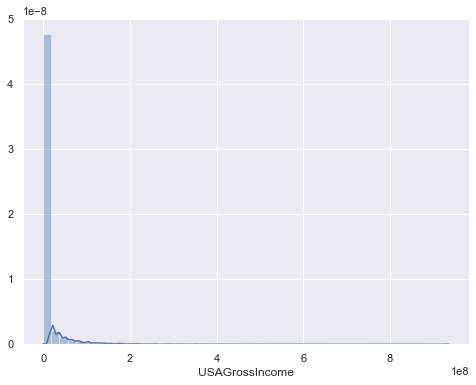

In [75]:
plt.figure(figsize=(8,6))
plt.tight_layout()
sns.distplot(USMoviesDf2['USAGrossIncome'])

# Most movies make revenue on the lower end and very few are blockbusters.

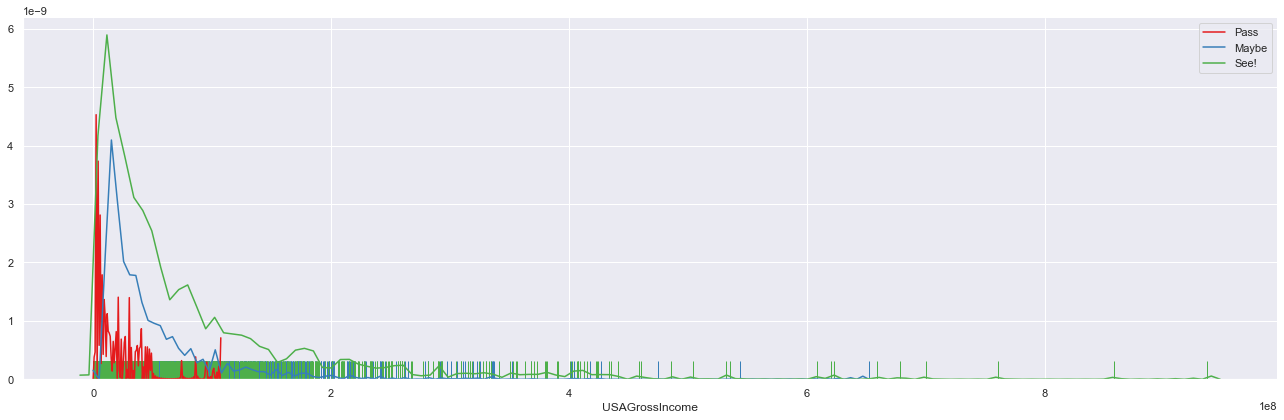

In [76]:
# Distribution of films based on AvgVoteClass and income generated.
g = sns.FacetGrid(USMoviesDf2, hue="AvgVoteClass", palette="Set1", height=6, aspect=3)
g = (g.map(sns.distplot, "USAGrossIncome", hist=False, rug=True))
plt.legend()
plt.show()


In [77]:
USMoviesDf2.genre1Class.nunique()


21

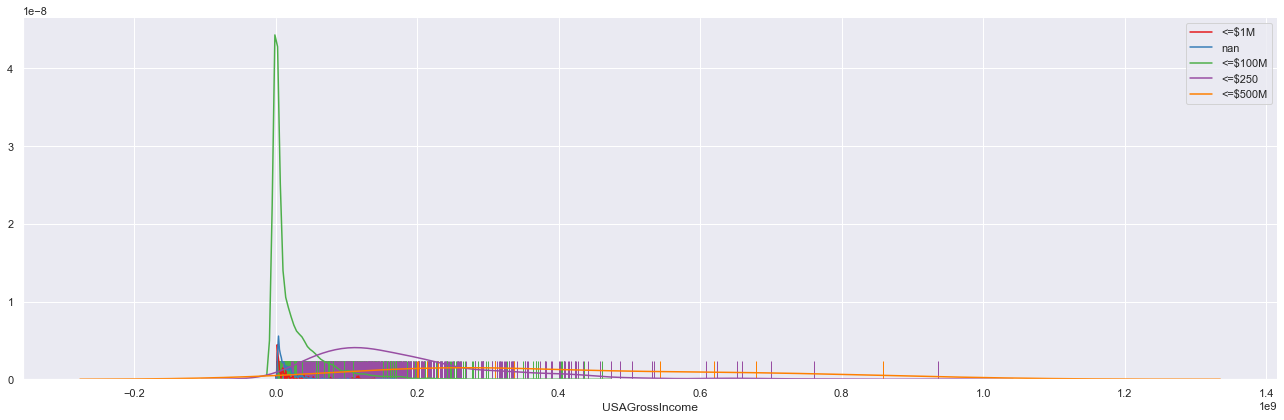

In [78]:
# Distribution of films based on BudgetClass and income generated.
g = sns.FacetGrid(USMoviesDf2, hue="BudgetClass", palette="Set1", height=6, aspect=3)
g = (g.map(sns.distplot, "USAGrossIncome", hist=False, rug=True))
plt.legend()
plt.show()


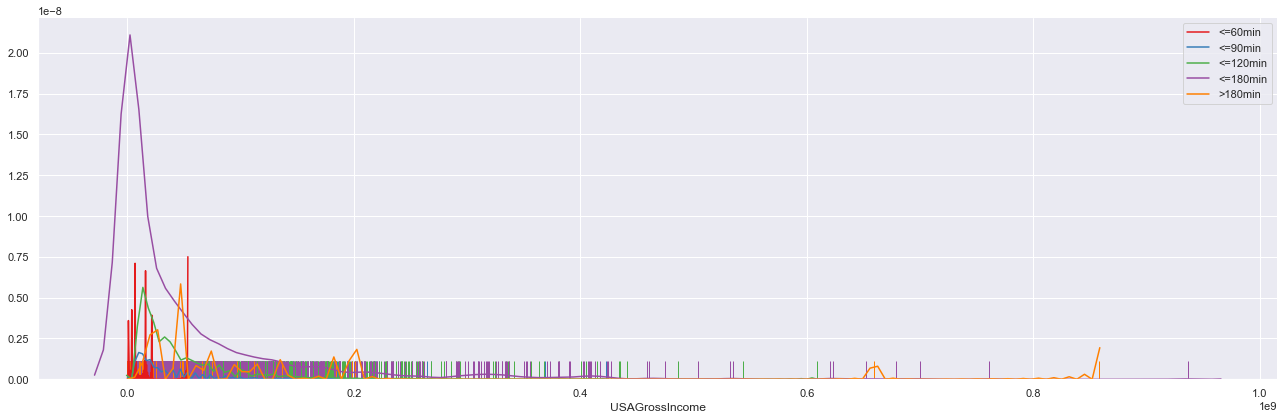

In [79]:
# Distribution of films based on DurationClass and income generated.
g = sns.FacetGrid(USMoviesDf2, hue="DurationClass", palette="Set1", height=6, aspect=3)
g = (g.map(sns.distplot, "USAGrossIncome", hist=False, rug=True))
plt.legend()
plt.show()

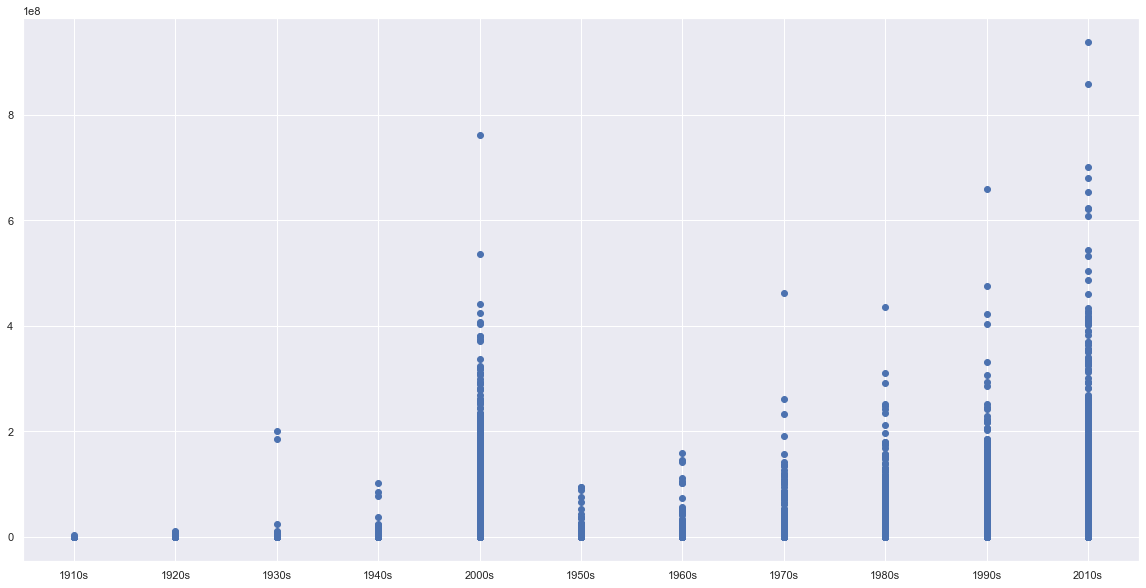

In [80]:
#Correlation: decade vs USAGrossIncome
plt.scatter(USMoviesDf2['decade'], USMoviesDf2['USAGrossIncome'])


#### Not adjusted for inflation, films of the 2010s decade made the most money followed by the 2000s and 1990s.

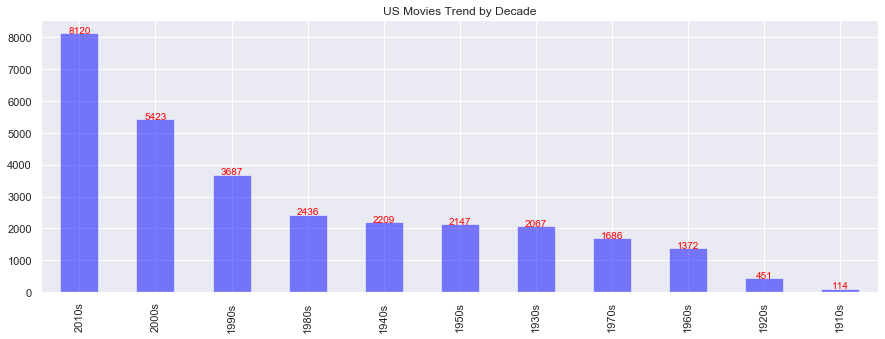

In [81]:
# Trends of how many movies made in the US?
USMoviesDf2['decade'].value_counts().plot(kind='bar', color="blue", alpha=0.5, figsize=(15,5))
plt.title('US Movies Trend by Decade')

# Get current axis on current figure
ax = plt.gca()

# Iterate through the list of axes' patches 
for p in ax.patches:  
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=10, color='red', ha='center', va='baseline', rotation=0) 
plt.show()



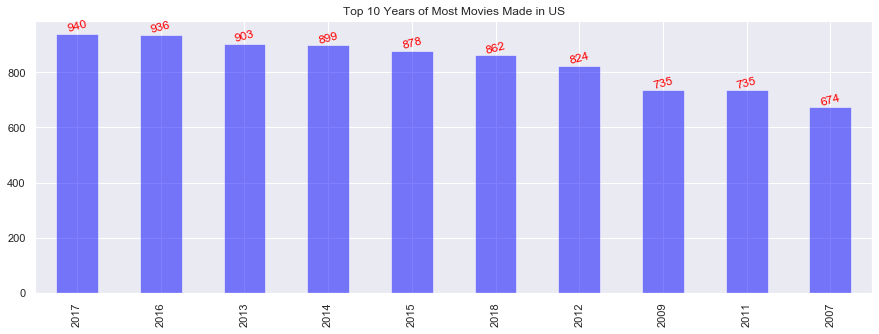

In [82]:
# Choose the Top 10 years of movies produced
USMoviesDf2['year'].value_counts()[0:10].plot(kind='bar', color="blue", alpha=0.5, figsize=(15,5))
plt.title('Top 10 Years of Most Movies Made in US')

# Get current axis on current figure
ax = plt.gca()

# Iterate through the list of axes' patches
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='red', ha='center', va='bottom', rotation=15)

plt.show()


In [83]:
HighGross = USMoviesDf2.loc[USMoviesDf2['RevenueClass'] == '>$500M']
HighGross.sort_values(by='USAGrossIncome', ascending=False)


,year,decade,month,title,Writer1,Writer1Class,Director1,Director1Class,lead_actor,LeadActorClass,...,DurationClass,duration,UsersReviews,CriticsReviews,avg_vote,AvgVoteClass,budget,BudgetClass,USAGrossIncome,RevenueClass
65123,2015,2010s,12,Star Wars: Episode VII - The Force Awakens,Lawrence Kasdan,5,J.J. Abrams,5,Harrison Ford,5,...,<=180min,138.0,4548.0,883.0,7.9,See!,245000000.0,<=$250,936662225.0,>$500M
71243,2019,2010s,4,Avengers: Endgame,Christopher Markus,5,Anthony Russo,5,Robert Downey Jr.,5,...,>180min,181.0,8302.0,531.0,8.5,See!,356000000.0,<=$500M,858373000.0,>$500M
48072,2009,2000s,12,Avatar,James Cameron,5,James Cameron,5,Sam Worthington,5,...,<=180min,162.0,3304.0,727.0,7.8,See!,237000000.0,<=$250,760507625.0,>$500M
60062,2018,2010s,2,Black Panther,Ryan Coogler,5,Ryan Coogler,5,Chadwick Boseman,5,...,<=180min,134.0,3062.0,664.0,7.3,See!,200000000.0,<=$250,700059566.0,>$500M
71242,2018,2010s,4,Avengers: Infinity War,Christopher Markus,5,Anthony Russo,5,Robert Downey Jr.,5,...,<=180min,149.0,4111.0,591.0,8.5,See!,321000000.0,<=$500M,678815482.0,>$500M
30262,1997,1990s,1,Titanic,James Cameron,5,James Cameron,5,Leonardo DiCaprio,5,...,>180min,194.0,2721.0,324.0,7.8,See!,200000000.0,<=$250,659363944.0,>$500M
42553,2015,2010s,6,Jurassic World,Rick Jaffa,5,Colin Trevorrow,5,Chris Pratt,5,...,<=180min,124.0,1489.0,688.0,7.0,Maybe,150000000.0,<=$250,652270625.0,>$500M
49418,2012,2010s,4,The Avengers,Joss Whedon,5,Joss Whedon,5,Robert Downey Jr.,5,...,<=180min,143.0,1859.0,738.0,8.0,See!,220000000.0,<=$250,623357910.0,>$500M
65276,2017,2010s,12,Star Wars: Episode VIII - The Last Jedi,Rian Johnson,5,Rian Johnson,5,Mark Hamill,5,...,<=180min,152.0,6218.0,690.0,7.1,See!,317000000.0,<=$500M,620181382.0,>$500M
69387,2018,2010s,7,Incredibles 2,Brad Bird,5,Brad Bird,5,Craig T. Nelson,5,...,<=120min,118.0,1033.0,385.0,7.7,See!,200000000.0,<=$250,608581744.0,>$500M


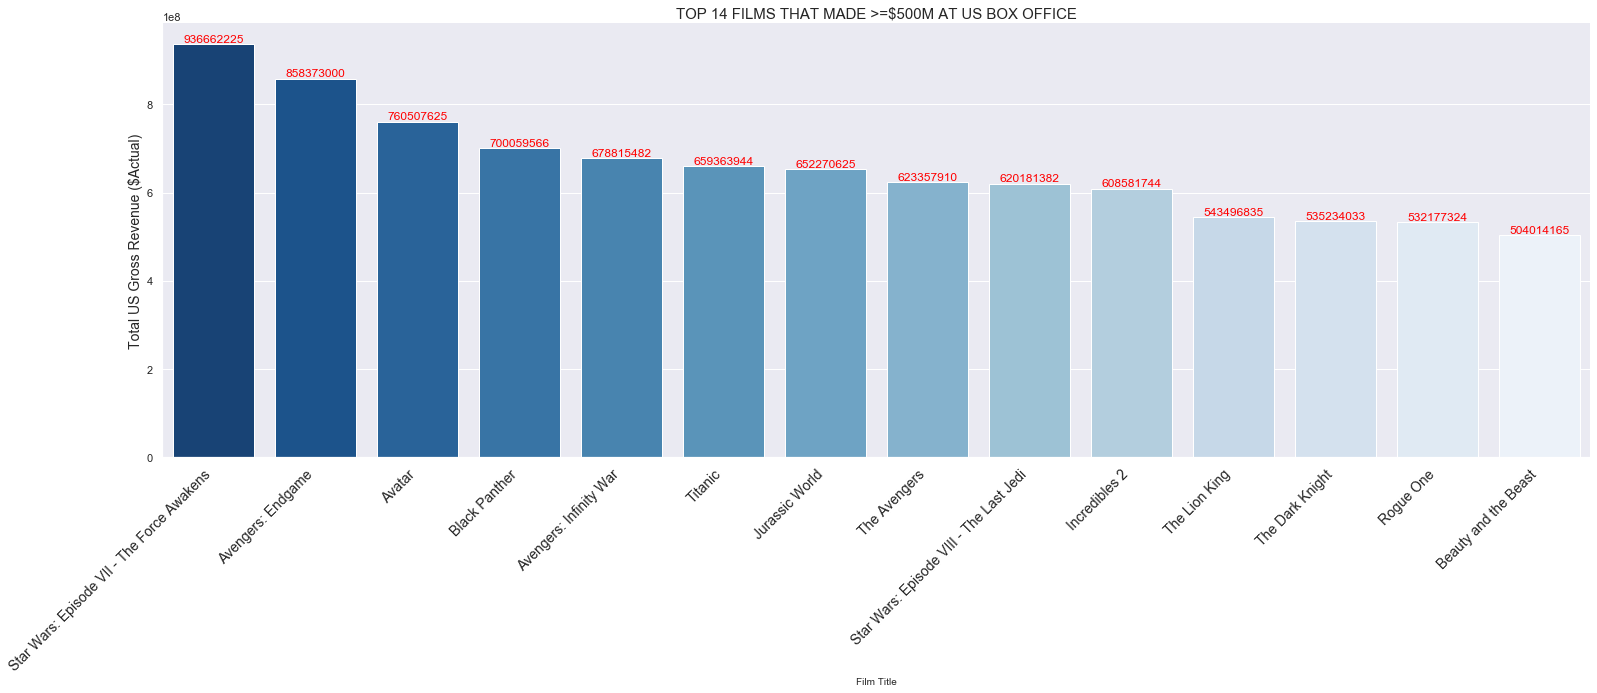

In [84]:
sns.catplot(x="title", y="USAGrossIncome", kind='bar', height=7, aspect=3, palette="Blues_r", data=HighGross, order=HighGross.sort_values('USAGrossIncome',ascending = False).title)
plt.xticks(rotation=45, horizontalalignment='right', fontsize=14)
plt.title('TOP 14 FILMS THAT MADE >=$500M AT US BOX OFFICE', fontsize=15)
plt.xlabel('Film Title', fontsize=10)
plt.ylabel('Total US Gross Revenue ($Actual)', fontsize=14)

# Get current axis on current figure
ax = plt.gca()

# Iterate through the list of axes' patches
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % (p.get_height()), 
            fontsize=12, color='red', ha='center', va='bottom', rotation=0)

plt.show()

### 14 US films grossed over $500M domestically and had profitability of 95%-334%. Ten of them were action films, 2 animation, 1 drama and 1 family.


### Significantly more films were made in 2010s than in other decades before. This decade had nearly 50%, almost 700, more films produced than in the second most decade, 2000s.  Furthermore, 2010s can boast of having 10 of the top 14 grossing films.


In [85]:
# Get % of films in the categories listed in RevClass
USMoviesDf2['RevenueClass'].value_counts(normalize=True) #normalize = number (False) or % (True)

### Historically, 32% (2,879) of US films made revenue of $1M or less, 60% (5,350) are over $1M to $100M, 6% (563) are over $100M to $250M, 1% (96) are over $250M to $500M, and 0.1% (14) make over $500M.


nan        0.700390
<=$100M    0.180062
<=$1M      0.096897
<=$250     0.018949
<=$500M    0.003231
>$500M     0.000471
Name: RevenueClass, dtype: float64

### STATISTICS

In [86]:
filt2 = ['duration', 'avg_vote', 'budget', 'USAGrossIncome']
corr = USMoviesDf2[filt2].corr()
corr


,duration,avg_vote,budget,USAGrossIncome
duration,1.000000,0.242756,0.295135,0.264446
avg_vote,0.242756,1.000000,0.166513,0.207378
budget,0.295135,0.166513,1.000000,0.763373
USAGrossIncome,0.264446,0.207378,0.763373,1.000000


#### Gross income is most correlated with budget (76%), duration (26%) and avg_vote (21%).

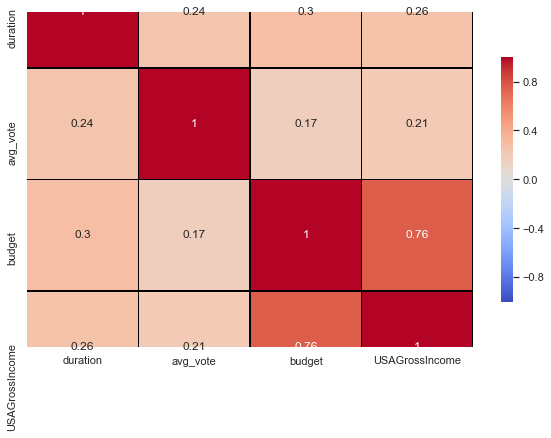

In [87]:
#Heatmap of USMoviesDf2.corr
f, ax = plt.subplots(figsize=(10, 9))
sns.heatmap(corr, cbar_kws={"shrink": .5}, annot=True, vmin=-1, vmax=1, center= 0, fmt='.2g', cmap= 'coolwarm', linewidths=.5, linecolor='black', square=True)


In [88]:
# Using the OLS Regression Model in the statsmodel.api library to create a regression equation that models 
# USAGrossIncome against all your independent variables

import statsmodels.api as sm
from statsmodels.formula.api import ols

filt3 = ['duration', 'avg_vote', 'budget']

X = USMoviesDf2[filt3] #independent factors
y = USMoviesDf2['USAGrossIncome'] #dependent factor
X = sm.add_constant(X) # adding a constant term to the predictor for y-int

model = sm.OLS(y,X)
results = model.fit() 
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         USAGrossIncome   R-squared:                       0.590
Model:                            OLS   Adj. R-squared:                  0.590
Method:                 Least Squares   F-statistic:                 1.425e+04
Date:                Fri, 31 Jul 2020   Prob (F-statistic):               0.00
Time:                        18:44:38   Log-Likelihood:            -5.4417e+05
No. Observations:               29712   AIC:                         1.088e+06
Df Residuals:                   29708   BIC:                         1.088e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.477e+07   7.93e+05    -18.625      0.000   -1.63e+07   -1.32e+07
duration    4.845e+04   7265.158      6.668      0.000    3.42e+04    6.27e+04
avg_vote    2.034e+06   1.01e+05     20.073      0.000    1.84e+06    2.23e+06
budget         1.2132      0.006    190.004      0.000       1.201       1.226
==============================================================================
Omnibus:                    37136.523   Durbin-Watson:                   1.953
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         15795364.495
Skew:                           6.462   Prob(JB):                         0.00
Kurtosis:                     115.213   Cond. No.                     1.36e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.36e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

"""
RESULTS: 

-'R-squared' reflects the fit of the model with the higher value within the range of 0-1 indicating a better fit. This OLS regression result shows R-squared of 0.59 (59%) suggesting a moderate fit. This means that other factors may affect the gross income of a film such as lead actor, director, genre and when the film is released.

-The 'const' coef(ficient) is the y-intercept and it is -1.477e+07.

-The coef(ficient) for each of the factors (budget, duration and avg_vote) reflects the change in the output of Y given one unit change in the factor with everything else held constant.

"""

### SCENARIO 1: LINEAR REGRESSION WITH TRAIN/TEST/SPLIT

In [89]:
USMoviesDf3 = USMoviesDf2[['duration', 'avg_vote', 'budget', 'USAGrossIncome']]
print(USMoviesDf3.head())
print(USMoviesDf3.shape)

    duration  avg_vote   budget  USAGrossIncome
2      100.0       5.2  45000.0             0.0
4       60.0       5.7      0.0             0.0
15      55.0       5.7      0.0             0.0
17      88.0       6.1   5700.0             0.0
20      78.0       6.5      0.0             0.0
(29712, 4)


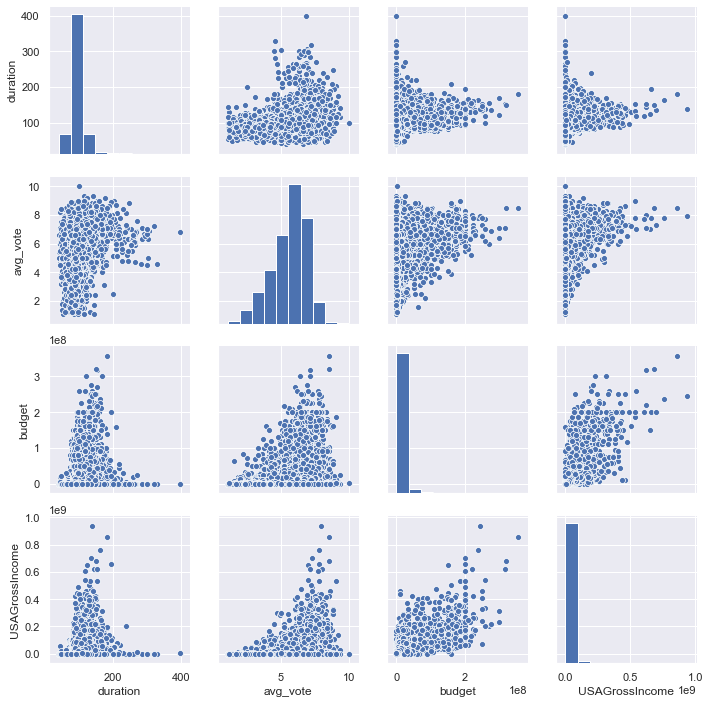

In [90]:
sns.pairplot(USMoviesDf3)

In [92]:
USMoviesDf3.describe()

,duration,avg_vote,budget,USAGrossIncome
count,29712.000000,29712.000000,2.971200e+04,2.971200e+04
mean,94.069029,5.607078,6.079335e+06,8.564550e+06
std,18.586816,1.291569,2.080610e+07,3.398784e+07
min,40.000000,1.100000,0.000000e+00,0.000000e+00
25%,85.000000,4.800000,0.000000e+00,0.000000e+00
50%,92.000000,5.800000,0.000000e+00,0.000000e+00
75%,102.000000,6.500000,1.200000e+06,6.914475e+04
max,398.000000,10.000000,3.560000e+08,9.366622e+08


In [93]:
#Show X, which consists of the independent variabless
X = USMoviesDf3[['duration', 'avg_vote', 'budget']]
X.head()


,duration,avg_vote,budget
2,100.0,5.2,45000.0
4,60.0,5.7,0.0
15,55.0,5.7,0.0
17,88.0,6.1,5700.0
20,78.0,6.5,0.0


In [94]:
#Show y, which is the dependent variable
y = USMoviesDf3.USAGrossIncome
y.head()


2     0.0
4     0.0
15    0.0
17    0.0
20    0.0
Name: USAGrossIncome, dtype: float64

In [95]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=4)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(26740, 3) (2972, 3) (26740,) (2972,)


In [96]:
# What's in the split X_train and X_test datasets? Show the number of rows and data of randomly split 60/40 data
print(X_train.head())
print(X_test.head())


       duration  avg_vote      budget
341        87.0       6.5         0.0
61559     101.0       4.5         0.0
257        89.0       6.8         0.0
25601      90.0       8.0  28000000.0
7319       62.0       6.6         0.0
       duration  avg_vote   budget
66414      88.0       5.0      0.0
13702      97.0       5.5      0.0
42511      83.0       5.8      0.0
58942      82.0       2.8      0.0
15158     130.0       5.5  90000.0


In [97]:
from sklearn.linear_model import LinearRegression


In [98]:
# classifier, machine learning model
lr = LinearRegression() 

# Fit/train the model/algorithm
lr.fit(X_train, y_train) 


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [99]:
# Retrieve the intercept:
print(lr.intercept_)

# Retrieve the slope (coefficients):
lr_coeff = pd.DataFrame(lr.coef_, X.columns, columns=['Coefficient'])  
lr_coeff

# The linear regression equation is:
# y = (5.33126122e+04 x duration) + (2.029722e+06 x avg_vote) + (1.220090e+00 x budget) - 15370109

-15232026.8842731


,Coefficient
duration,5.151965e+04
avg_vote,2.066270e+06
budget,1.203416e+00


In [100]:
# Make predictions on the test data
y_pred = lr.predict(X_test)


In [101]:
# Compare actual and predicted values
lrDf = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'Difference': y_pred - y_test, '% Difference': ((y_pred - y_test)/y_pred)*100})
lrDf.head(13)


,Actual,Predicted,Difference,% Difference
66414,0.0,-3.669457e+05,-3.669457e+05,100.000000
13702,0.0,1.129866e+06,1.129866e+06,100.000000
42511,0.0,1.028472e+06,1.028472e+06,100.000000
58942,0.0,-5.221859e+06,-5.221859e+06,100.000000
15158,0.0,2.938322e+06,2.938322e+06,100.000000
17139,0.0,2.490357e+06,2.490357e+06,100.000000
11944,0.0,3.195040e+06,3.195040e+06,100.000000
12618,0.0,3.454832e+06,3.454832e+06,100.000000
53346,0.0,1.389110e+06,1.389110e+06,100.000000
57239,212940.0,-1.131398e+06,-1.344338e+06,118.820963


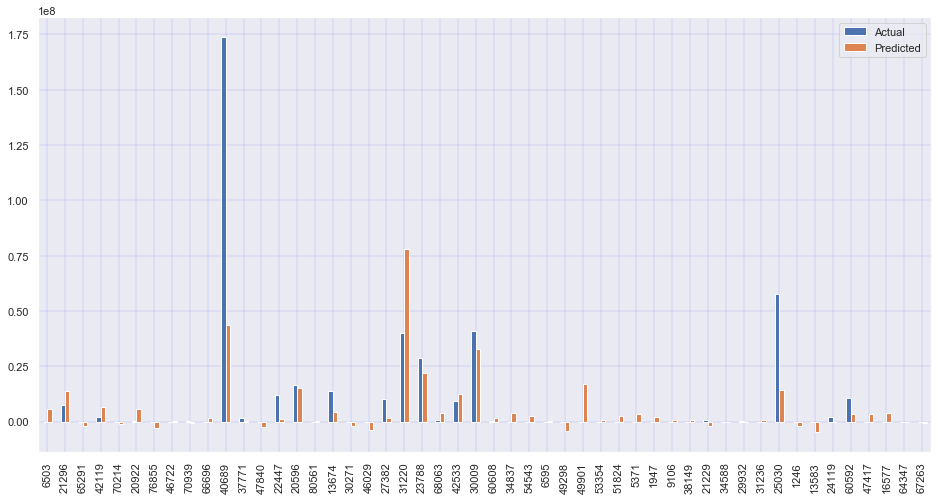

In [102]:
# Plotting only 50 records for representation purposes since the number of records is large (nearly 12,000)
lrDf1 = lrDf[['Actual','Predicted']]
lrDf2 = lrDf1.tail(50)
lrDf2.plot(kind='bar',figsize=(16,8))
plt.grid(which='major', linestyle='-', linewidth='0.1', color='blue')
plt.grid(which='minor', linestyle=':', linewidth='0.1', color='black')
plt.show()


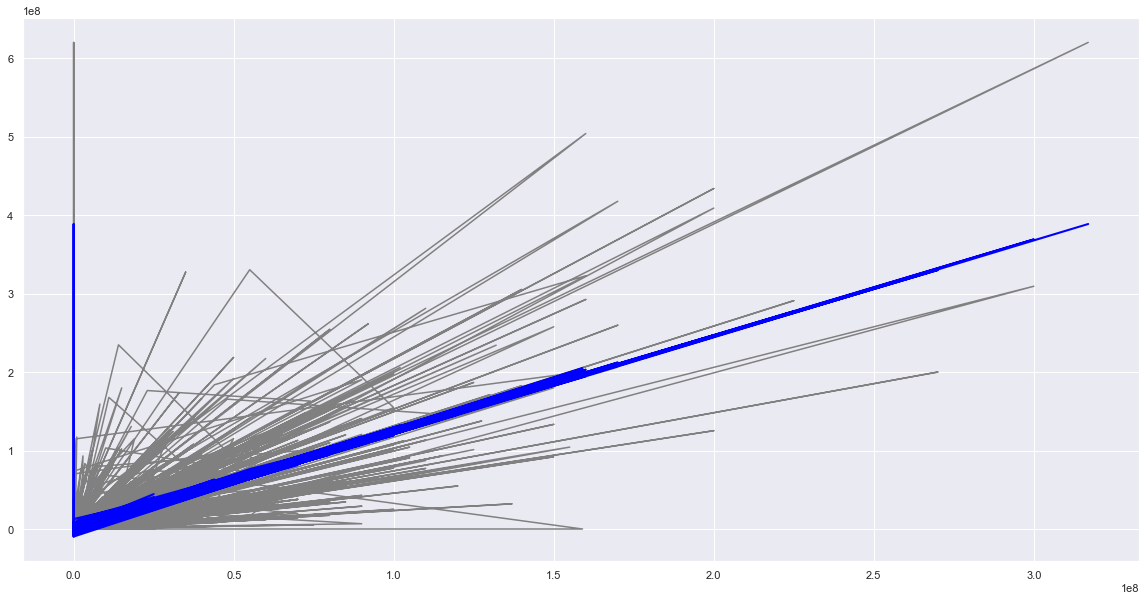

In [103]:
# Plot our predicted line with the test data 
plt.plot(X_test, y_test, color='gray')
plt.plot(X_test, y_pred, color='blue', linewidth=2)

plt.show()

# This plot shows our prediction algorithm is somewhat in line with test data.

In [104]:
from sklearn import metrics

# Evaluate the performance of the algorithm using Mean Absolute Error
# It's important to compare how well different algorithms perform on a particular dataset. 
# For regression algorithms, 3 evaluation metrics could be used:
# Mean Absolute Error (MAE) is the mean of the absolute value of the errors
# Mean Squared Error (MSE) is the mean of the squared errors, which is the difference between the observed and predicted values of a variable
# Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


# These metrics show that linear regression model is not very accurate.


Mean Absolute Error: 8281926.871810815
Mean Squared Error: 489930026523035.5
Root Mean Squared Error: 22134363.025012385


In [105]:
# Model accuracy score
lr.score(X_test, y_test)

# Why accuracy score is about 60%, which could be better if not possibly for the following reasons:
# 1. Bad data: are there too many inclusions of films with 0 values in the features?
# 2. Poor assumptions: these variables do not have a linear relationship? Or another type of model is better?
# 3. Bad features: the selected features do not have good correlation to gross income or there are other features that should be considered?


0.652419551824282

### Re-run above linear regression model using different test sizes to compare accuracy rates.

"""
All has random state = 4

* Test size 10% = 0.652419551824282 
* Test size 25% = 0.6108873805942424
* Test size 40% = 0.5985559193709225
* Test size 50% = 0.5952976753065962

"""

In [106]:
# Example: Enter independent features to get the target value: duration: 120, avg_vote = 5, budget = $200M

lr.predict([(120,5,200000000)])

# Based on these feature variables, the film is predicted to generate $245M, which is a 22.5% ($45M) profit margin.

array([2.41964839e+08])

### SCENARIO 2: RE-RUN LINEAR REGRESSION MODEL BUT REMOVE ROWS WITH 0 VALUES

In [107]:
# Re-run LR model but this time removing rows with any 0 values
USMoviesDf4 = USMoviesDf3[~(USMoviesDf3 == 0.0).any(axis=1)]
USMoviesDf4 

,duration,avg_vote,budget,USAGrossIncome
232,150.0,7.2,800000.0,9183673.0
1005,87.0,8.5,1500000.0,19181.0
2336,87.0,8.5,1500000.0,163577.0
2687,83.0,7.6,1499000.0,184925486.0
3100,238.0,8.1,3977000.0,200852579.0
...,...,...,...,...
80299,87.0,6.2,13500000.0,39014193.0
80665,147.0,7.2,10000000.0,27426361.0
80858,109.0,5.8,6000000.0,19005109.0
80946,96.0,4.5,29900000.0,18847824.0


In [108]:
X1 = USMoviesDf4[['duration', 'avg_vote', 'budget']]
y1 = USMoviesDf4.USAGrossIncome

In [109]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.1, random_state=4)
print(X1_train.shape, X1_test.shape, y1_train.shape, y1_test.shape)


(4970, 3) (553, 3) (4970,) (553,)


In [110]:
# classifier, machine learning model
lr1 = LinearRegression() 

# Fit/train the model/algorithm
lr1.fit(X1_train, y1_train) 


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [111]:
# Retrieve the intercept:
print(lr1.intercept_)

# Retrieve the slope (coefficients):
lr_coeff1= pd.DataFrame(lr.coef_, X1.columns, columns=['Coefficient'])  
lr_coeff1


-73366343.83608389


,Coefficient
duration,5.151965e+04
avg_vote,2.066270e+06
budget,1.203416e+00


In [112]:
# Make predictions on the test data
y_pred1 = lr.predict(X1_test)


In [113]:
# Compare actual and predicted values
lrDf1 = pd.DataFrame({'Actual': y1_test, 'Predicted': y_pred1, 'Difference': y_pred1 - y1_test, '% Difference': ((y_pred1 - y1_test)/y_pred1)*100})
lrDf1.head(10)


,Actual,Predicted,Difference,% Difference
66592,130179072.0,1.360854e+08,5.906352e+06,4.340179
49066,13944.0,9.976359e+04,8.581959e+04,86.022957
61115,1832541.0,1.801294e+07,1.618040e+07,89.826528
14507,33036.0,3.512917e+06,3.479881e+06,99.059585
22135,7137502.0,3.150233e+06,-3.987269e+06,-126.570591
35130,48818921.0,4.480046e+07,-4.018461e+06,-8.969688
50646,266967.0,2.300124e+07,2.273427e+07,98.839336
53892,754301.0,2.829649e+07,2.754219e+07,97.334295
35482,17200925.0,3.943580e+07,2.223488e+07,56.382464
40441,93354851.0,7.478065e+07,-1.857420e+07,-24.838238


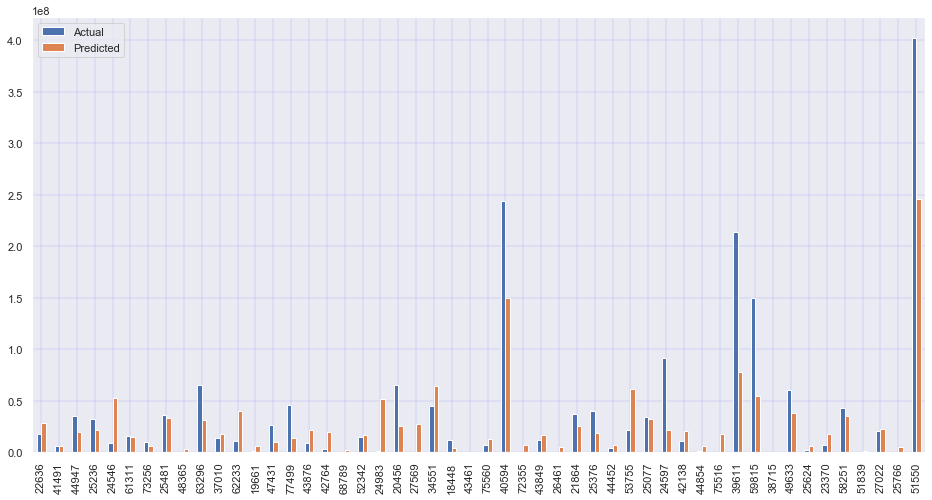

In [114]:
# Plotting only 50 records for representation purposes since the number of records is large (nearly 12,000)
lrDf2 = lrDf1[['Actual','Predicted']]
lrDf3 = lrDf2.tail(50)
lrDf3.plot(kind='bar',figsize=(16,8))
plt.grid(which='major', linestyle='-', linewidth='0.1', color='blue')
plt.grid(which='minor', linestyle=':', linewidth='0.1', color='black')
plt.show()

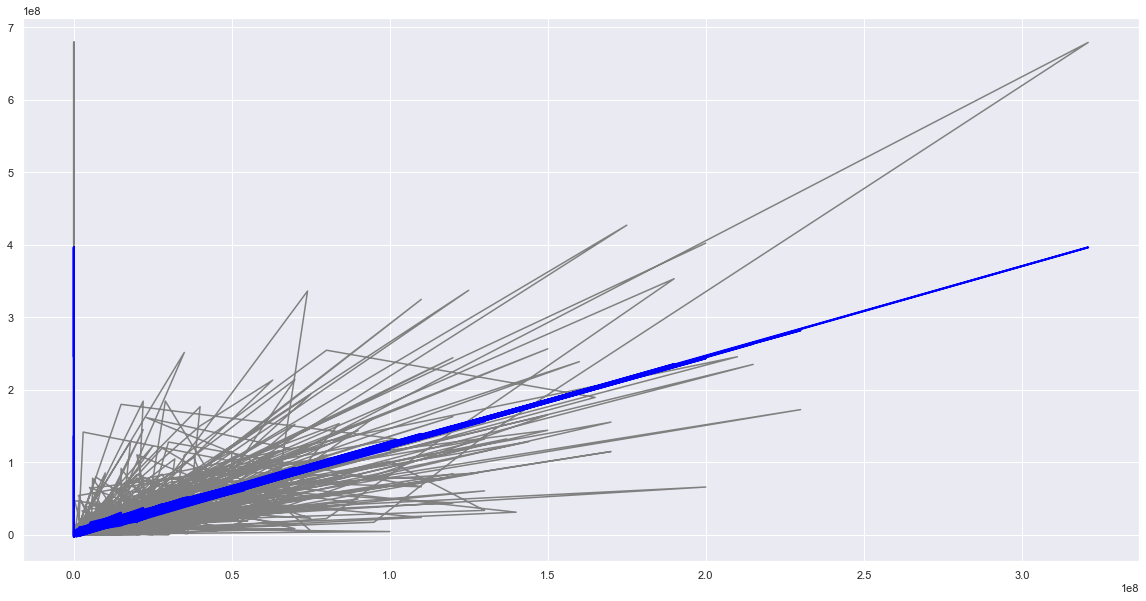

In [115]:
# Plot our predicted line with the test data 
plt.plot(X1_test, y1_test, color='gray')
plt.plot(X1_test, y_pred1, color='blue', linewidth=2)

plt.show()

In [116]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y1_test, y_pred1))  
print('Mean Squared Error:', metrics.mean_squared_error(y1_test, y_pred1))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y1_test, y_pred1)))

# The result errors indicate a siginificant variance.

Mean Absolute Error: 24901674.132551577
Mean Squared Error: 1863880235576345.5
Root Mean Squared Error: 43172679.27261806


In [117]:
# Model accuracy score
lr1.score(X1_test, y1_test)

# Model has a lower accuracy (56.7%) after removing rows that have any zeroes. 
# Is this because the dataset is smaller or the features are still not correct?


0.56709389039221

In [118]:
#Example: Enter predictants to get the predictor

lr1.predict([(120,5,200000000)])

#If budget is $200M, duration is 120 mins and avg_vote is 5, the predicted revenue is $220M.

array([2.20380602e+08])

# STEP 4: INSIGHTS AND DISCUSSIONS OF ANALYSIS

In [ ]:
# Saving USMoviesDf2 to excel

# create excel writer object
#writer = pd.ExcelWriter('USMoviesDf2.xlsx')
# write dataframe to excel
#USMoviesDf2.to_excel(writer)
# save the excel
#writer.save()
#print('DataFrame is written successfully to Excel File.')